# Elliptic Bitcoin Transactions Graph Dataset - Results
### <i>Experiment 1.0 - Boosting Algorithms vs Random Forest</i> 
<hr>

### Table of Contents
- [Benchmark Models](#benchmark) <br>

In [1]:
###### importing dependencies #############################################
import seaborn as sns
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import (
    results_table, 
    plot_metric_dist,
    plot_feature_imp,
    print_model_params, 
    plot_result_matrices,
    display_metrics_stats,
    elliptic_time_indexed_results
)

###### constants ##########################################################
N_features          = 15 # for feature importance N top/bottom
EXP_RESULT_PATH     = "persistence/experiment_1/results"
BENCHMARK_RESULTS   = "{}/{}".format(EXP_RESULT_PATH, "benchmark_model_results.pkl")
DEFAULT_RESULTS     = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")
TUNED_RESULTS       = "{}/{}".format(EXP_RESULT_PATH, "tuned_models_iter_results.pkl")

<a id='benchmark'></a>
## Benchmark Models

Experiment performed on the [elliptic dataset](https://www.kaggle.com/ellipticco/elliptic-data-set) [1,2]

Models were tested on the following feature sets:
- Local Features (LF)
- Local Features and Node Embeddings extracted from GCN (LF_NE) 
- All Features - Aggregated Features and Local Features (AF)
- All Features and Node Embeddings extracted from GCN (AF_NE) 

__Results obtained in the original paper [2]__

<table style="border-collapse:collapse;border-spacing:0;border-color:#ccc" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" rowspan="2"><br><br>Method<br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" colspan="3">Illicit</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top">MicroAVG</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Precision</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Recall</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.404</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.593</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.481</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.931</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.537</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.528</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.533</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.348</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.457</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.920</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.518</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.571</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.543</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.956</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.670</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.788</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.977</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.971</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.675</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.796</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.978</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.803</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.611</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.874</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.759</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.973</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP (<span style="font-style:italic">AF</span>)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.653</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.962</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.780</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.689</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.967</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.637</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.662</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.649</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.958</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6819</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.5782</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6258</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.986</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.512</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.628</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.961</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">Skip-GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.623</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.705</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr></table>

<img width="100%" src="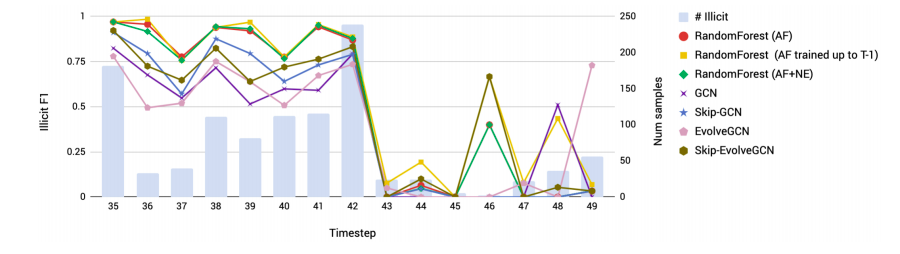
">

<small>
    <i>
   Illicit F1 results over test time span from benchmark paper [2].
    </i>
</small>

### Random Forest - Suggested Hyperparameters 

In [2]:
# load results for benchmark model
benchmark_model = "random_forest"
benchmark_results = read_pickle(BENCHMARK_RESULTS)

####  RF Suggested Hyperparameters - Evaluation Metrics

- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper. The results reproduce are very close to the ones documented in the benchmark paper [2], shown in the previous section. In our test run we managed to obtain higher results using the same hyperparameters specified.
    </i>
</small>

In [3]:
# dataframe with all the perfomance metrics
print("Performance metrics for benchmark model")
benchmark_metrics_df = results_table(benchmark_results)
display(benchmark_metrics_df)

# sorted by f1 score
print("Performance metrics for benchmark model sorted by f1-score")
display(benchmark_metrics_df.sort_values("f1", ascending=False))

Performance metrics for benchmark model


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_LF,0.868,0.688,0.973,0.973,0.841,0.768
1,random_forest_LF_NE,0.956,0.697,0.978,0.978,0.847,0.806
2,random_forest_AF,0.897,0.721,0.977,0.977,0.858,0.800
3,random_forest_AF_NE,0.958,0.715,0.979,0.979,0.857,0.819


Performance metrics for benchmark model sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
3,random_forest_AF_NE,0.958,0.715,0.979,0.979,0.857,0.819
1,random_forest_LF_NE,0.956,0.697,0.978,0.978,0.847,0.806
2,random_forest_AF,0.897,0.721,0.977,0.977,0.858,0.800
0,random_forest_LF,0.868,0.688,0.973,0.973,0.841,0.768


#### RF Suggested Hyperparameters - Evaluation Statistics

<i>Note: Since random forest is non-deterministic in nature, we ran the model for 100 iterations and averaged the results. This was done to insure robustness and was also recommended in previous studies.<i/>
    
Below we show statistics for the evaluation metrics.

'random_forest' on 'LF' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.868189,0.688319,0.972941,0.972941,0.840518,0.767706
std,29.011492,0.013338,0.010523,0.000517,0.000517,0.004890,0.004248
min,0.000000,0.837336,0.668513,0.971266,0.971266,0.831306,0.755238
25%,24.750000,0.858148,0.680517,0.972585,0.972585,0.836881,0.765461
50%,49.500000,0.867902,0.686519,0.972975,0.972975,0.839939,0.767695
75%,74.250000,0.877817,0.696214,0.973365,0.973365,0.844033,0.770368
max,99.000000,0.895191,0.715605,0.973905,0.973905,0.853215,0.777665


'random_forest' on 'LF_NE' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.955765,0.697054,0.978219,0.978219,0.847405,0.806136
std,29.011492,0.006867,0.003770,0.000250,0.000250,0.001761,0.001994
min,0.000000,0.937576,0.683287,0.977564,0.977564,0.840938,0.800214
25%,24.750000,0.951066,0.695060,0.978044,0.978044,0.846391,0.805056
50%,49.500000,0.955235,0.696214,0.978224,0.978224,0.847161,0.806383
75%,74.250000,0.959313,0.699215,0.978404,0.978404,0.848461,0.807533
max,99.000000,0.971539,0.707295,0.978764,0.978764,0.852011,0.809574


'random_forest' on 'AF' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.897260,0.721090,0.976504,0.976504,0.857670,0.799537
std,29.011492,0.013136,0.002091,0.000755,0.000755,0.000999,0.005063
min,0.000000,0.851249,0.715605,0.973845,0.973845,0.855140,0.782435
25%,24.750000,0.891273,0.719298,0.976170,0.976170,0.857014,0.797292
50%,49.500000,0.899368,0.721145,0.976665,0.976665,0.857727,0.800512
75%,74.250000,0.906141,0.722299,0.976965,0.976965,0.858328,0.802875
max,99.000000,0.918728,0.725762,0.977684,0.977684,0.859898,0.808247


'random_forest' on 'AF_NE' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.958395,0.715319,0.979485,0.979485,0.856579,0.819186
std,29.011492,0.006378,0.002989,0.000247,0.000247,0.001384,0.001833
min,0.000000,0.940821,0.702678,0.978824,0.978824,0.850761,0.814698
25%,24.750000,0.954601,0.713758,0.979364,0.979364,0.855950,0.817978
50%,49.500000,0.959108,0.715605,0.979544,0.979544,0.856776,0.819353
75%,74.250000,0.962558,0.716759,0.979604,0.979604,0.857383,0.820296
max,99.000000,0.976893,0.722068,0.979964,0.979964,0.859687,0.822906


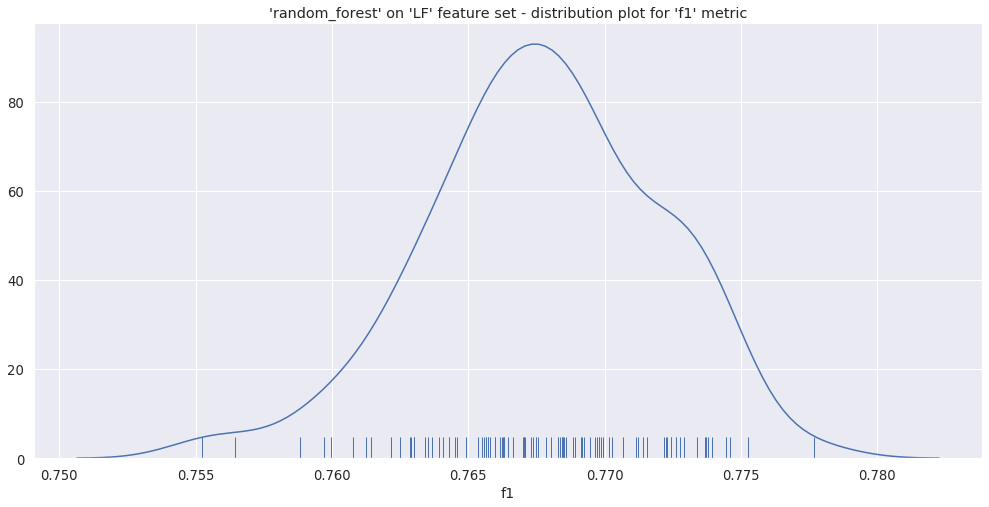

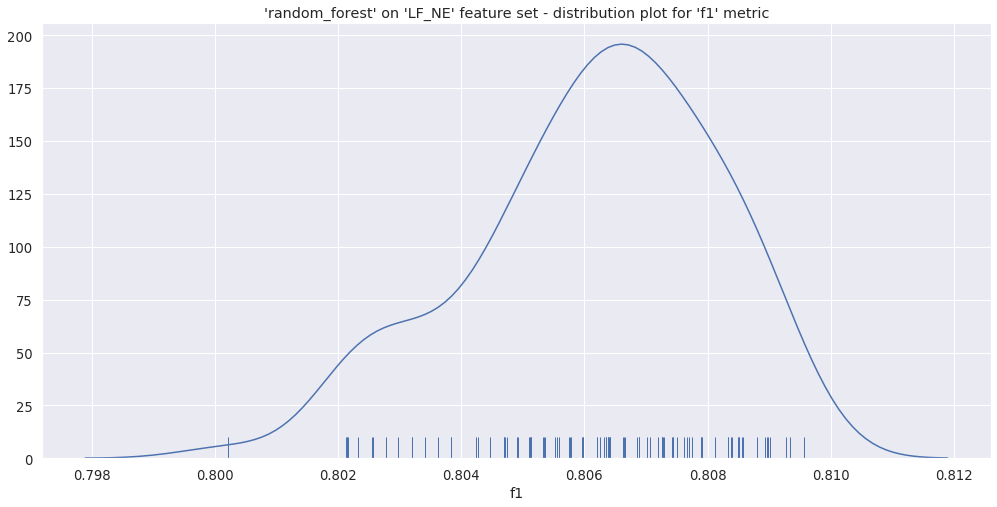

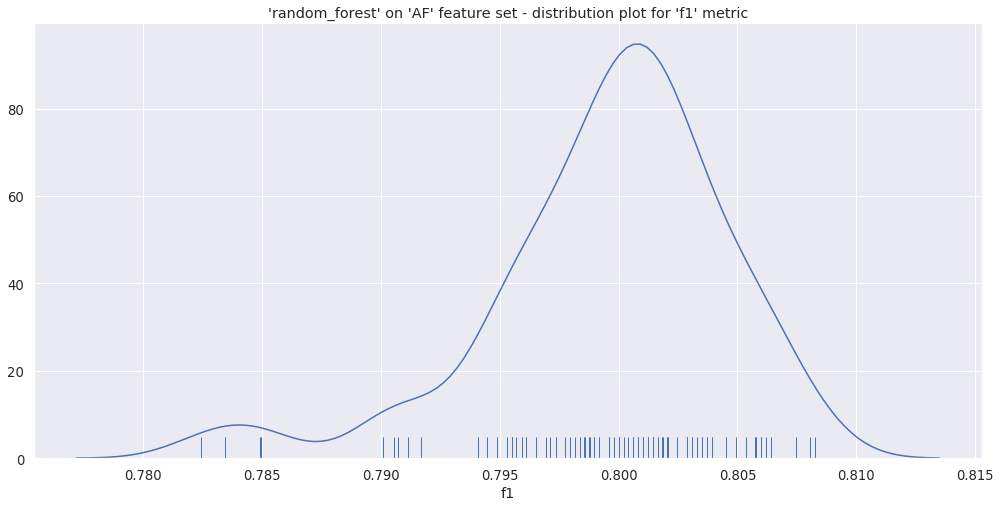

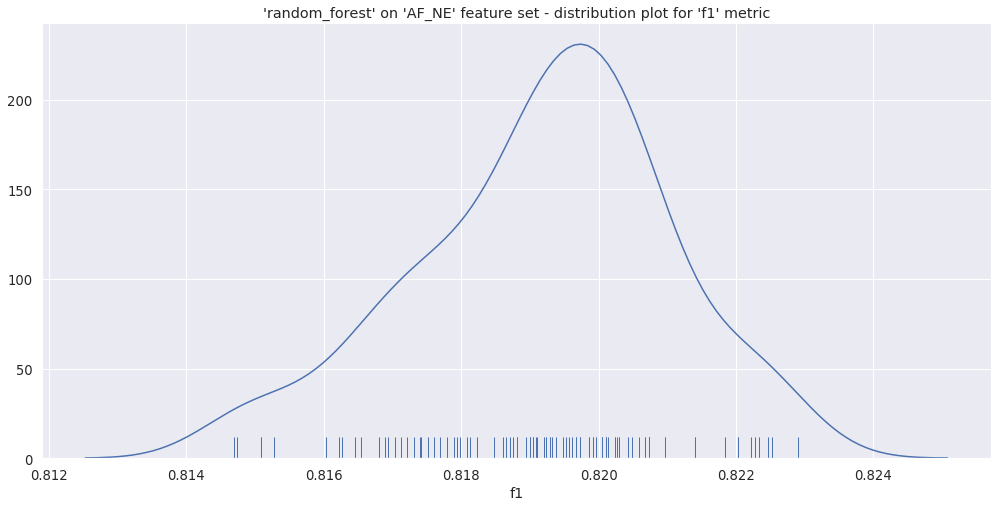

In [4]:
# display stats for each metric for benchmark model over 100 runs
display_metrics_stats(benchmark_results)

# plot f1 score distribution for benchmark model over 100 runs
plot_metric_dist(benchmark_results, "f1", figsize=(17,8))

####  RF Suggested Hyperparameters - Confusion Matrix

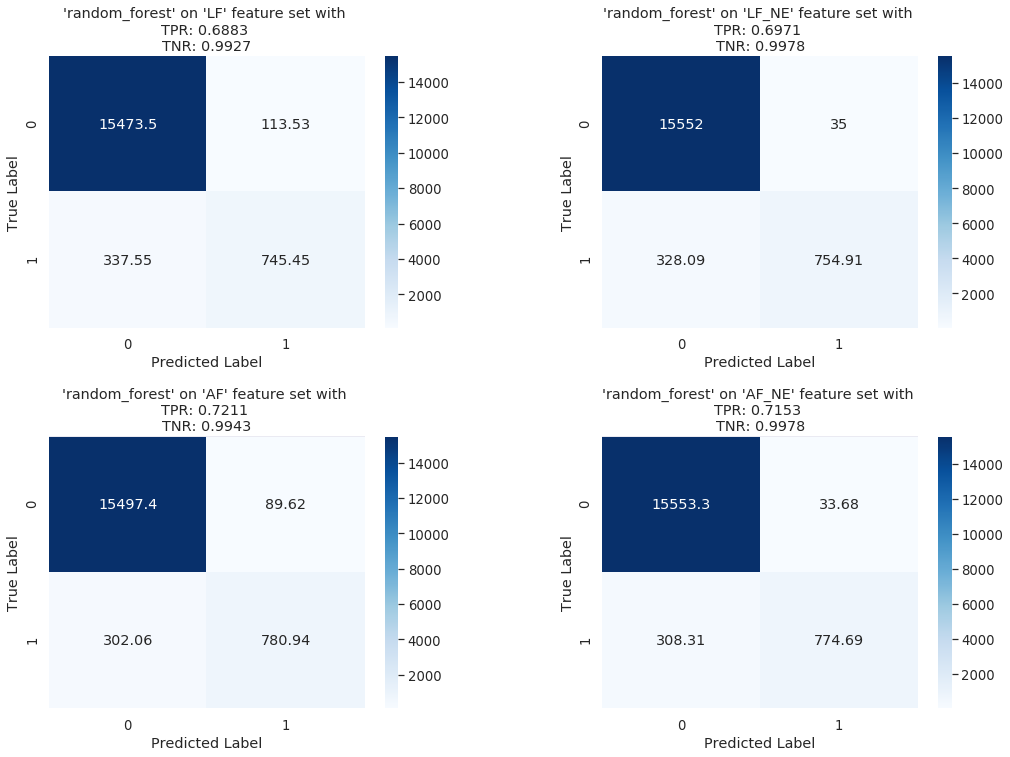

In [5]:
plot_result_matrices(benchmark_results, figsize=(17,12))

####  RF Suggested Hyperparameters - F1 Results over Test Span

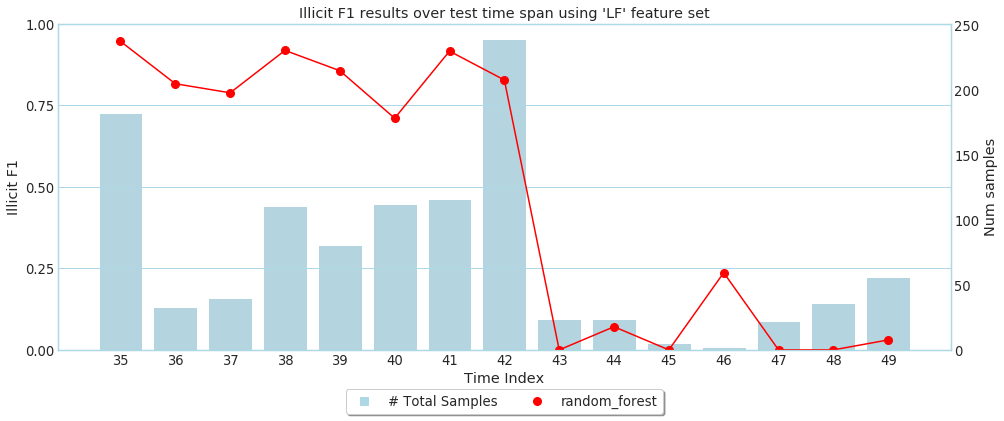

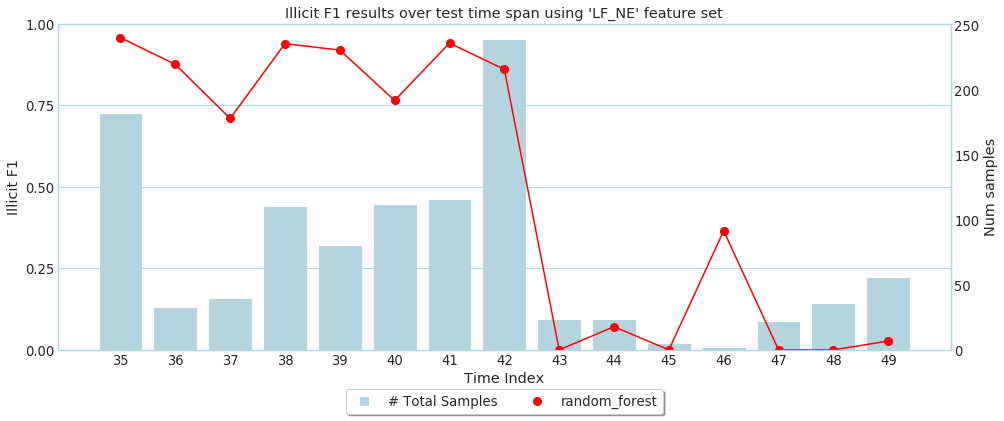

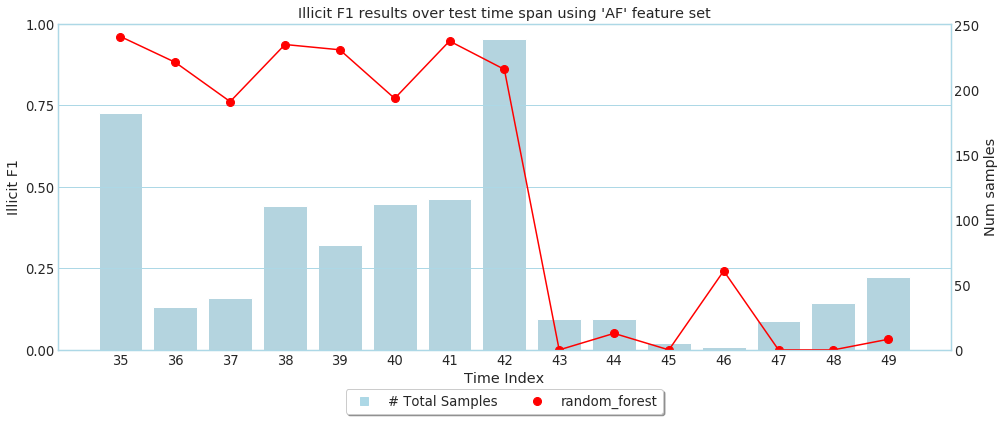

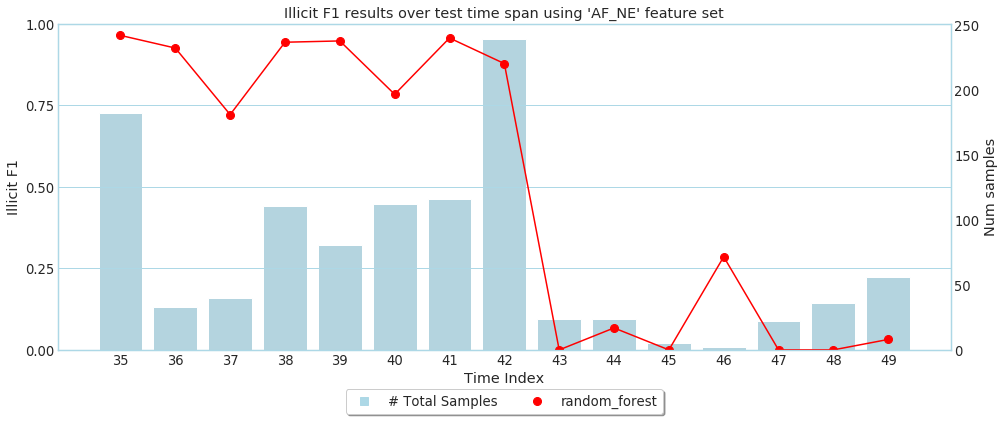

In [6]:
elliptic_time_indexed_results(benchmark_results)

####  RF Suggested Hyperparameters - Feature Importance

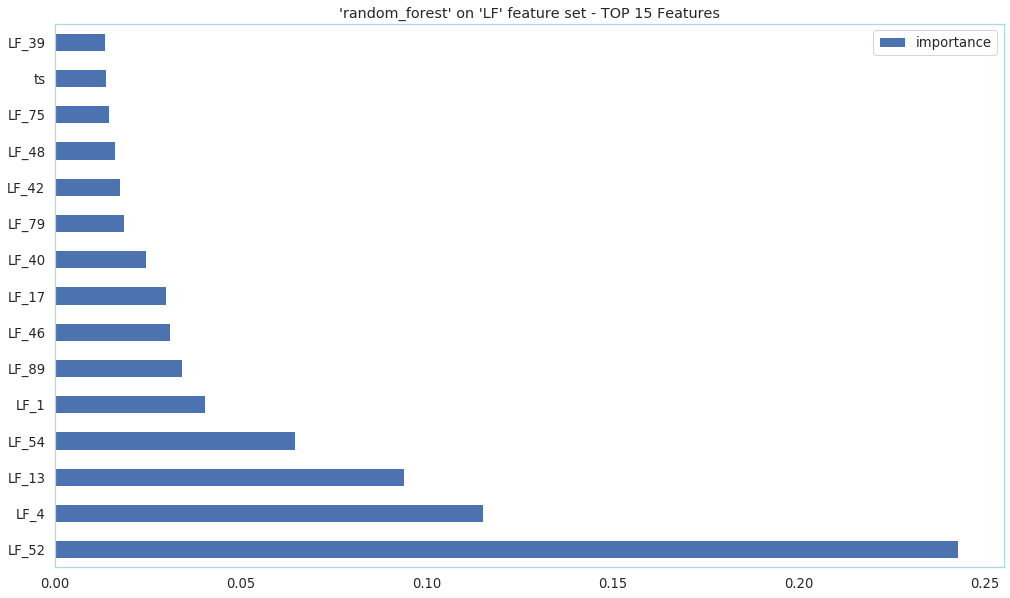

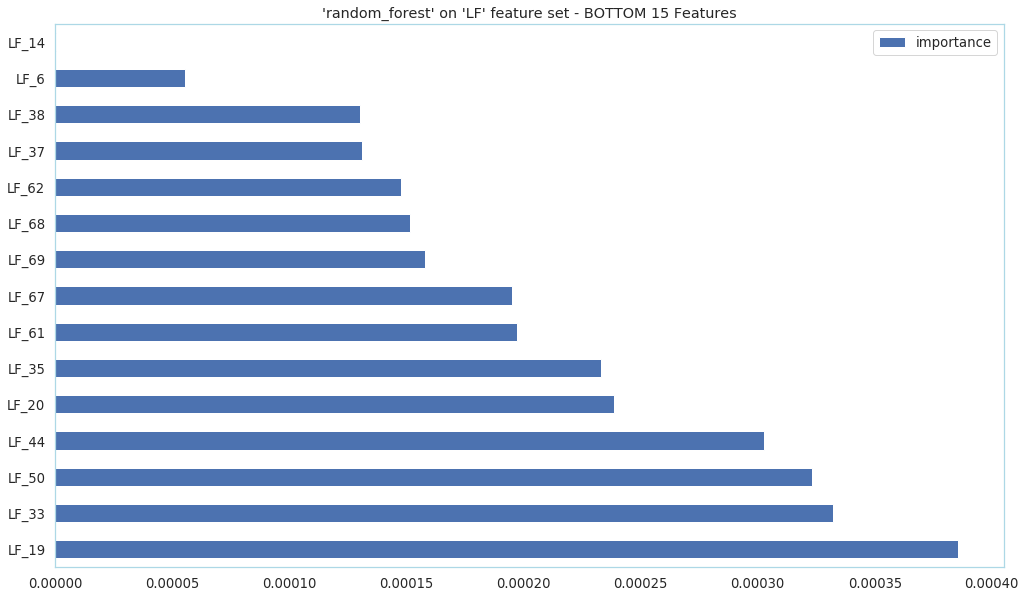

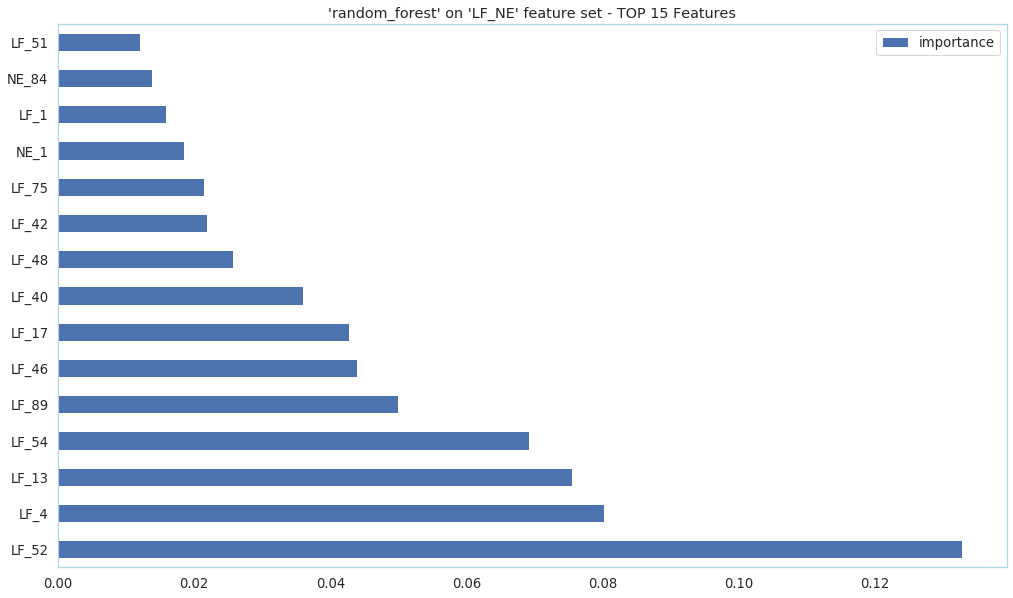

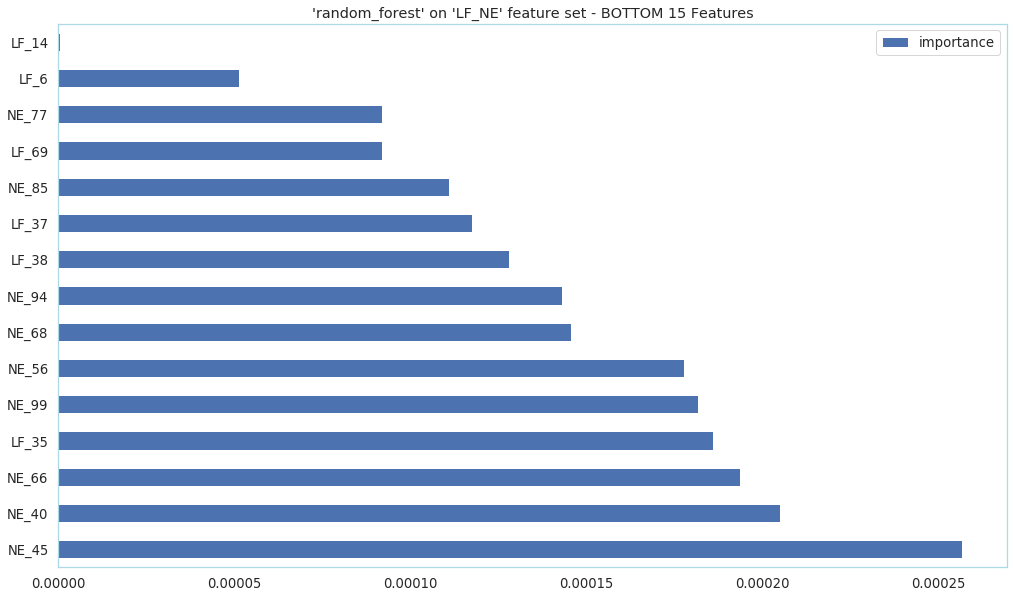

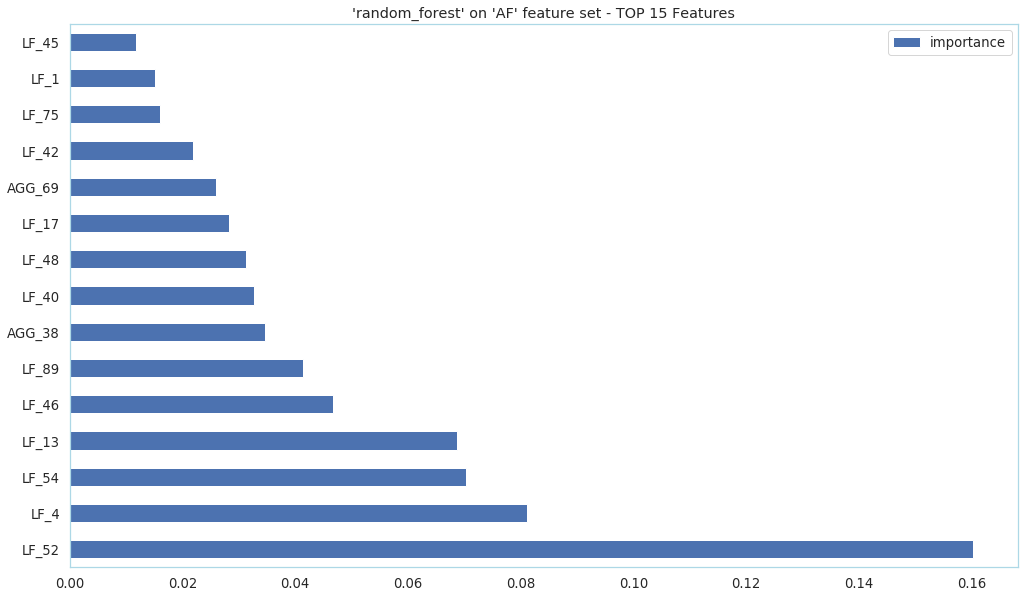

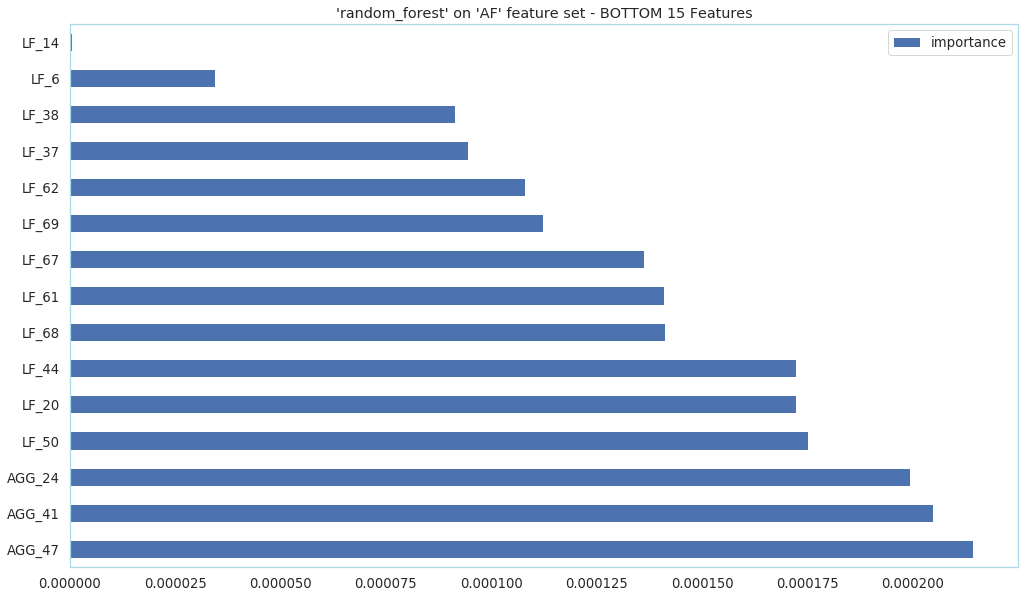

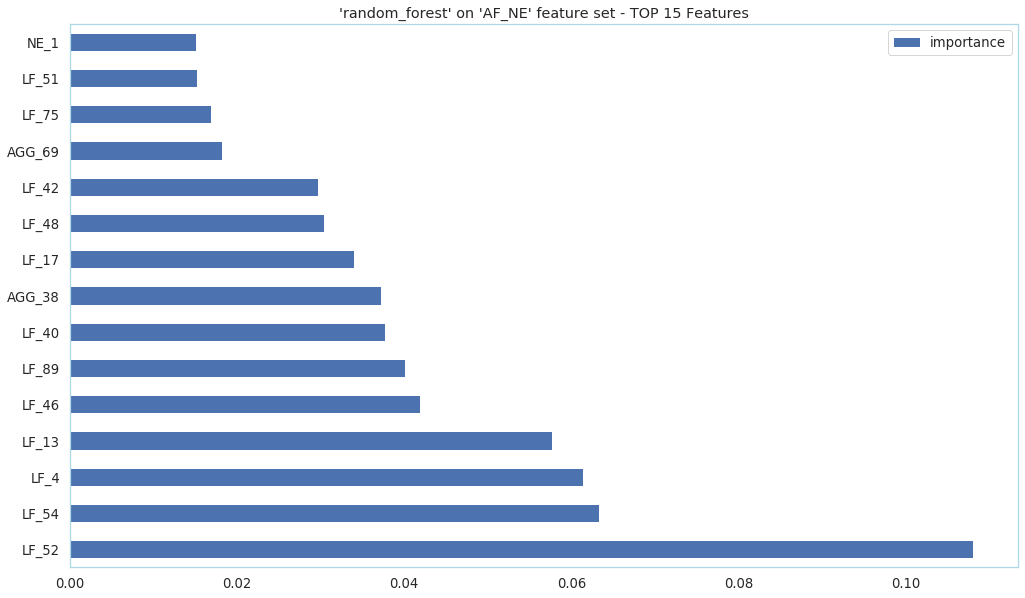

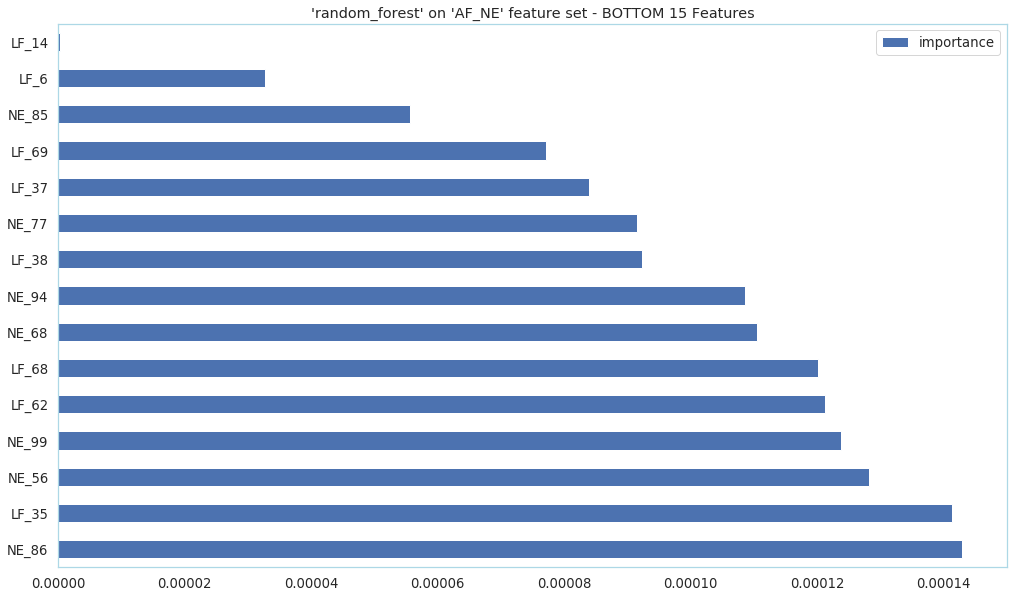

In [7]:
plot_feature_imp(benchmark_results, N_features)

####  RF Suggested Hyperparameters - Hyperparameters

Same hyperparameters utilised on all feature sets.

- n_estimators: 50
- max_features: 50

<small>
    <i>
    As described in the benchmark paper [2].
    </i>
</small>

In [8]:
print_model_params(benchmark_results)

Parameters used for 'random_forest' on 'LF' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 50,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 50,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


Parameters used for 'random_forest' on 'LF_NE' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 50,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 50,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


Parameters used for 'random_forest' on 'AF' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 50,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 50,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


Parameters used for 'random_forest' on 'AF_NE' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 50,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 50,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


## Boosting Algorithms
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/) 

### Boosting Algorithms - Default Hyperparameters 

In [9]:
default_results = read_pickle(DEFAULT_RESULTS)

#### Boosting Default Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [10]:
print("Performance metrics for defaults boosting models")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

print("Performance metrics for defaults boosting models sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for defaults boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_LF,0.877,0.702,0.974,0.974,0.847,0.779
1,xg_boost_LF_NE,0.988,0.665,0.978,0.978,0.832,0.795
2,xg_boost_AF,0.902,0.723,0.977,0.977,0.859,0.803
3,xg_boost_AF_NE,0.979,0.693,0.979,0.979,0.846,0.812
4,light_boost_LF,0.861,0.711,0.974,0.974,0.852,0.779
5,light_boost_LF_NE,0.977,0.681,0.978,0.978,0.840,0.803
6,light_boost_AF,0.931,0.723,0.979,0.979,0.860,0.814
7,light_boost_AF_NE,0.983,0.689,0.979,0.979,0.844,0.810
8,cat_boost_LF,0.907,0.701,0.976,0.976,0.848,0.791
9,cat_boost_LF_NE,0.981,0.680,0.978,0.978,0.839,0.803


Performance metrics for defaults boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
10,cat_boost_AF,0.949,0.721,0.979,0.979,0.859,0.820
11,cat_boost_AF_NE,0.983,0.696,0.979,0.979,0.848,0.815
6,light_boost_AF,0.931,0.723,0.979,0.979,0.860,0.814
3,xg_boost_AF_NE,0.979,0.693,0.979,0.979,0.846,0.812
7,light_boost_AF_NE,0.983,0.689,0.979,0.979,0.844,0.810
2,xg_boost_AF,0.902,0.723,0.977,0.977,0.859,0.803
5,light_boost_LF_NE,0.977,0.681,0.978,0.978,0.840,0.803
9,cat_boost_LF_NE,0.981,0.680,0.978,0.978,0.839,0.803
1,xg_boost_LF_NE,0.988,0.665,0.978,0.978,0.832,0.795
8,cat_boost_LF,0.907,0.701,0.976,0.976,0.848,0.791


#### Boosting Default Hyperparameters - Confusion Matrices

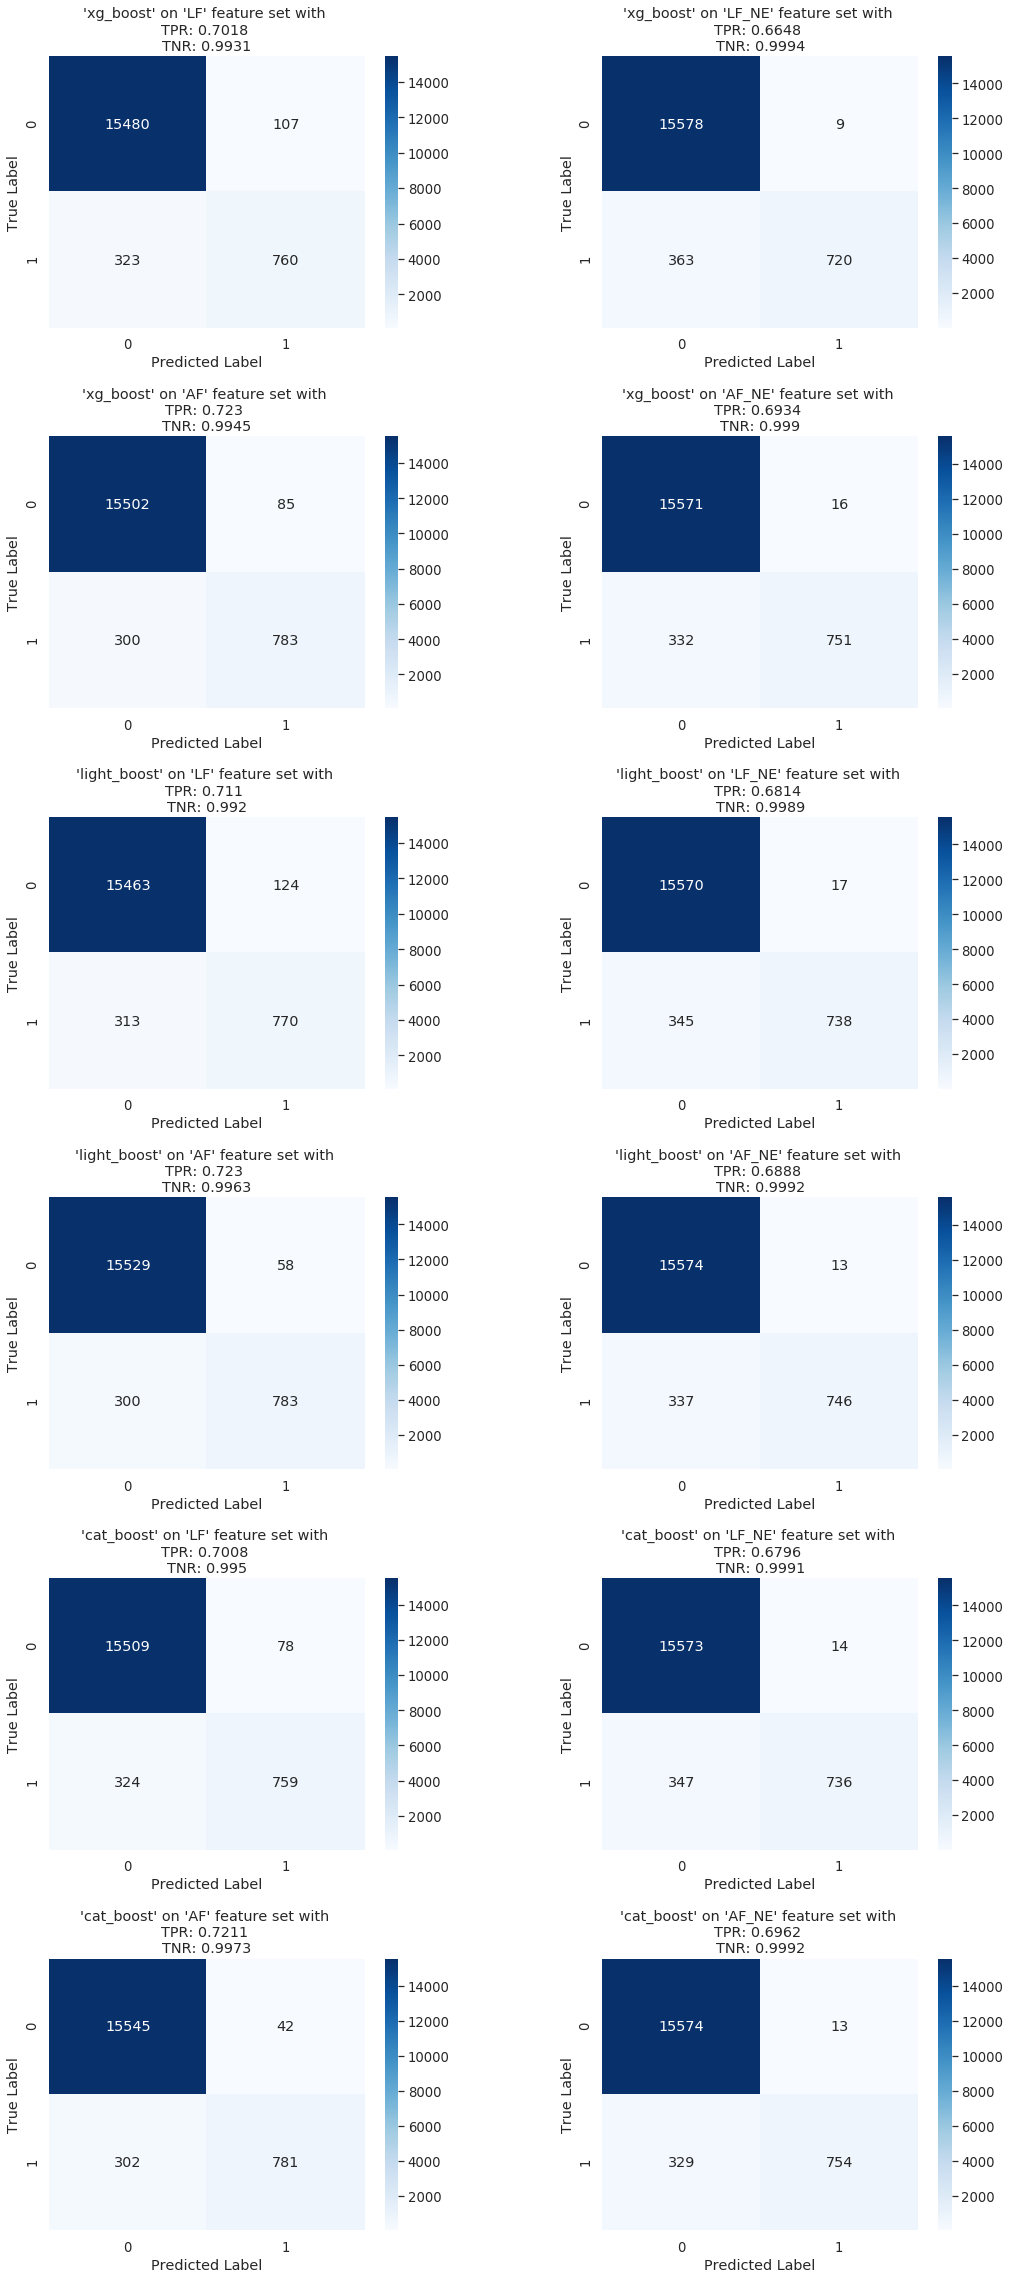

In [11]:
plot_result_matrices(default_results, figsize=(17,40))

#### Boosting Default Hyperparameters - F1 Results over Test Span

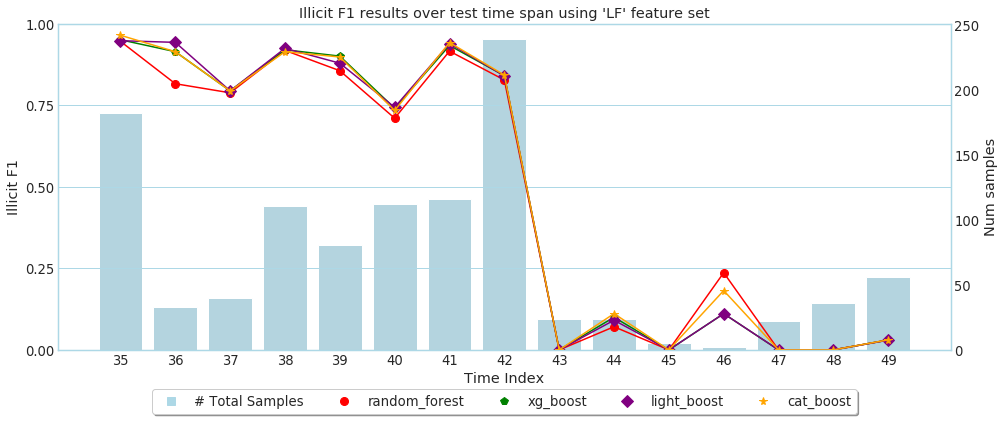

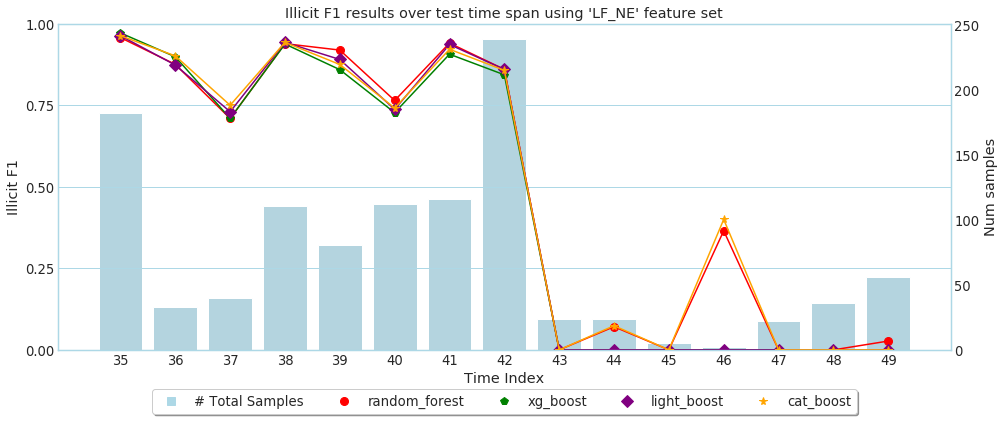

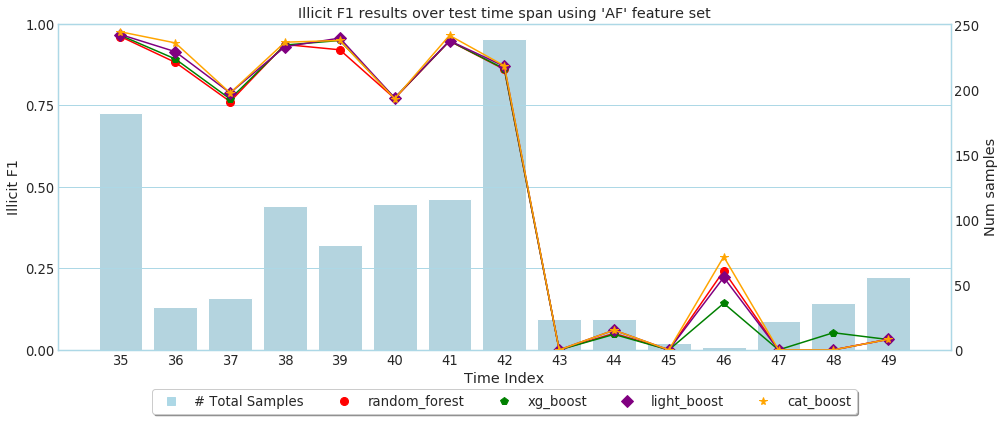

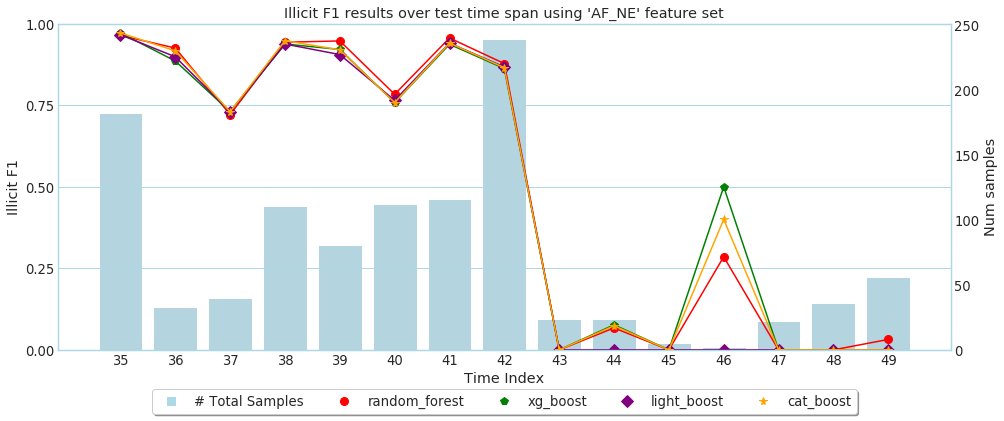

In [12]:
# in this plot we also display benchmark model
tmp_results = {**benchmark_results, **default_results}
elliptic_time_indexed_results(tmp_results)

#### Boosting Default Hyperparameters - Feature Importance

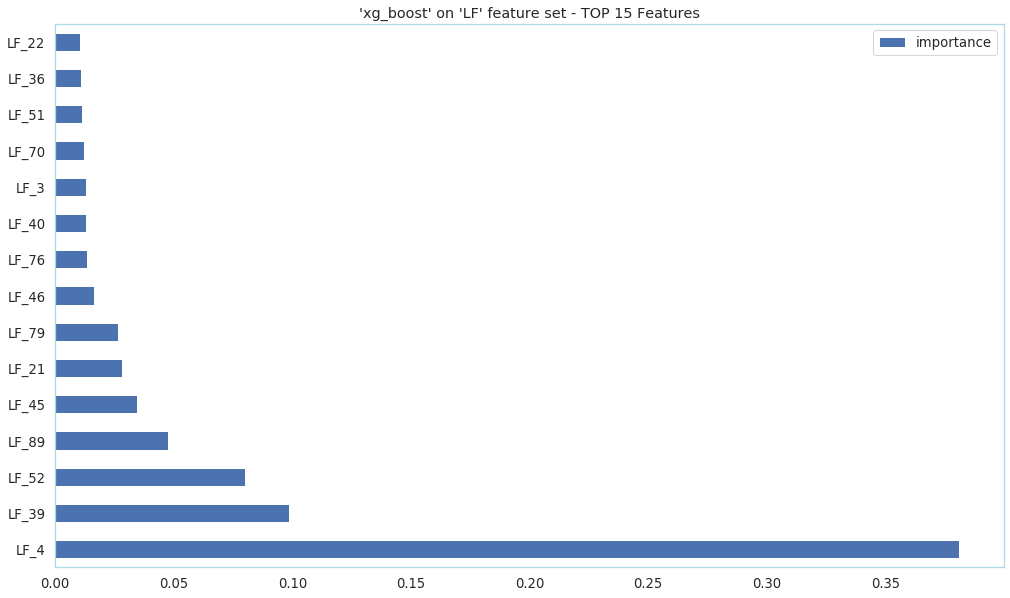

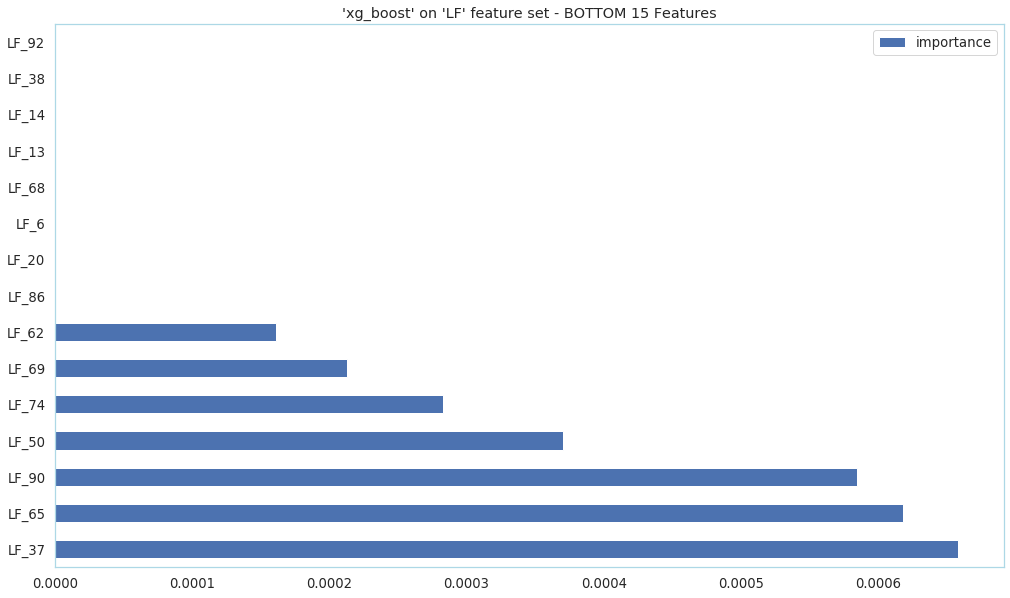

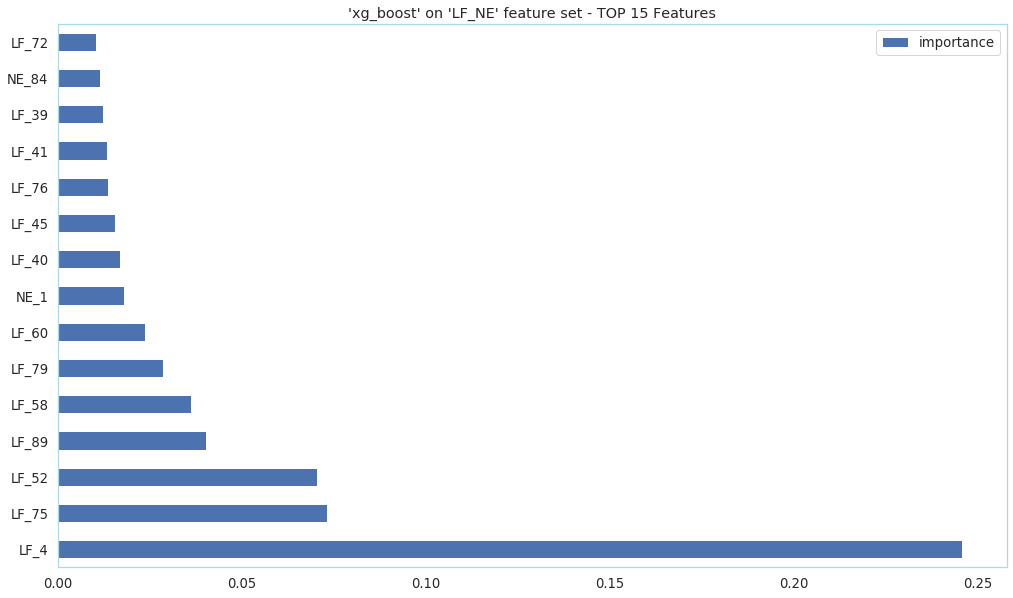

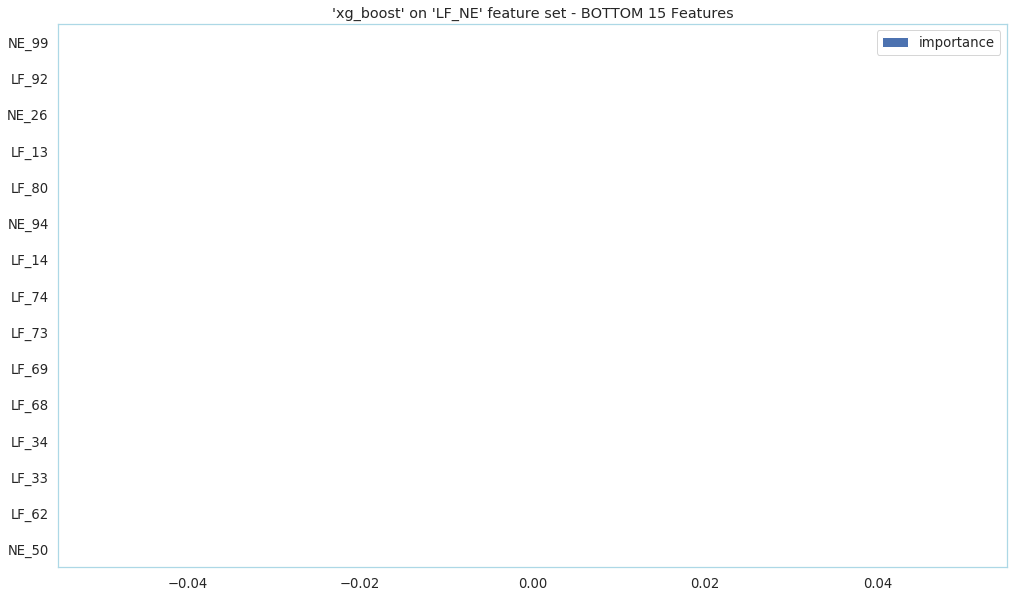

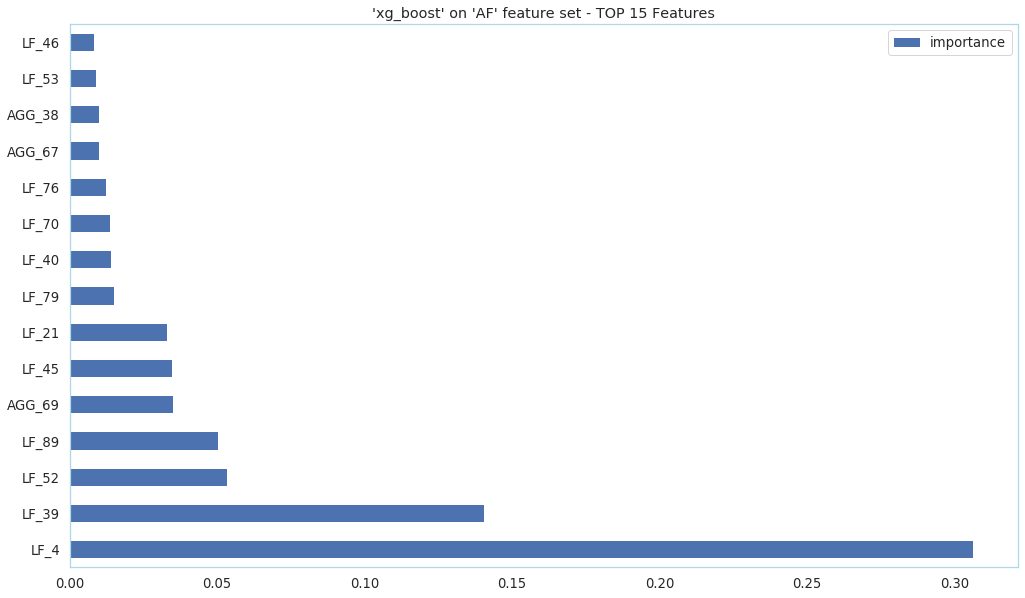

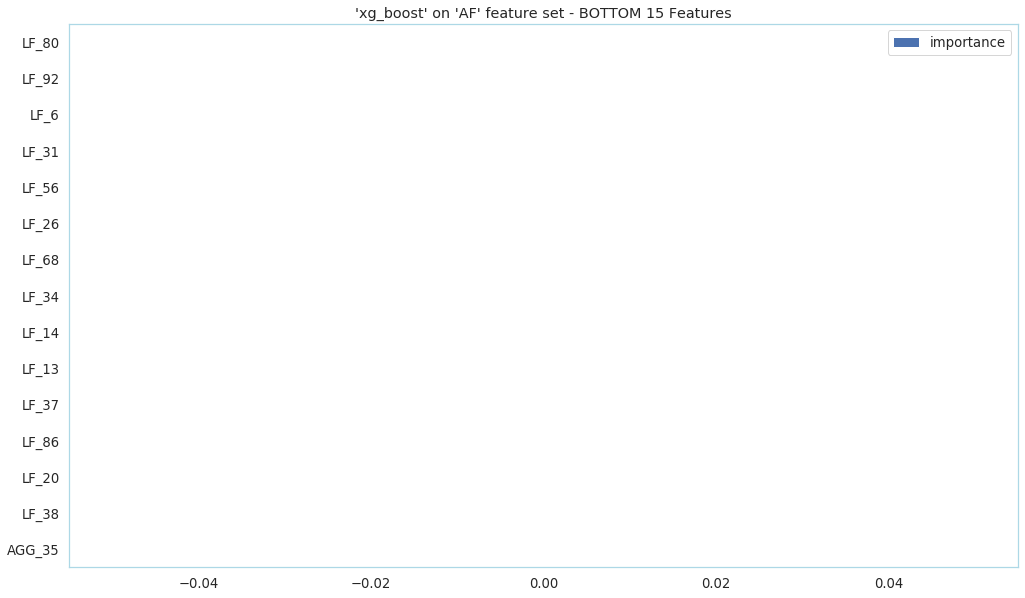

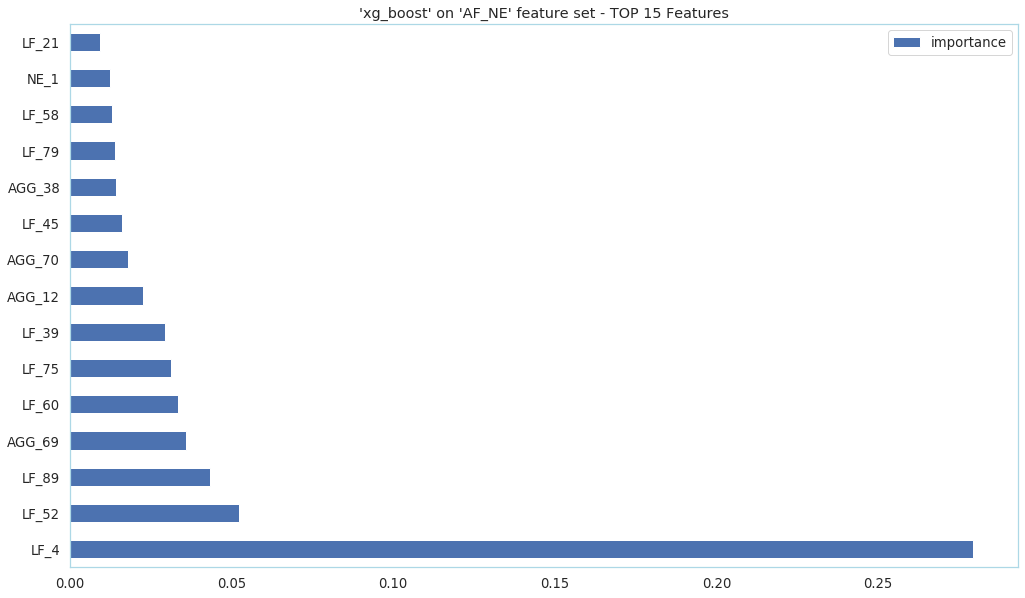

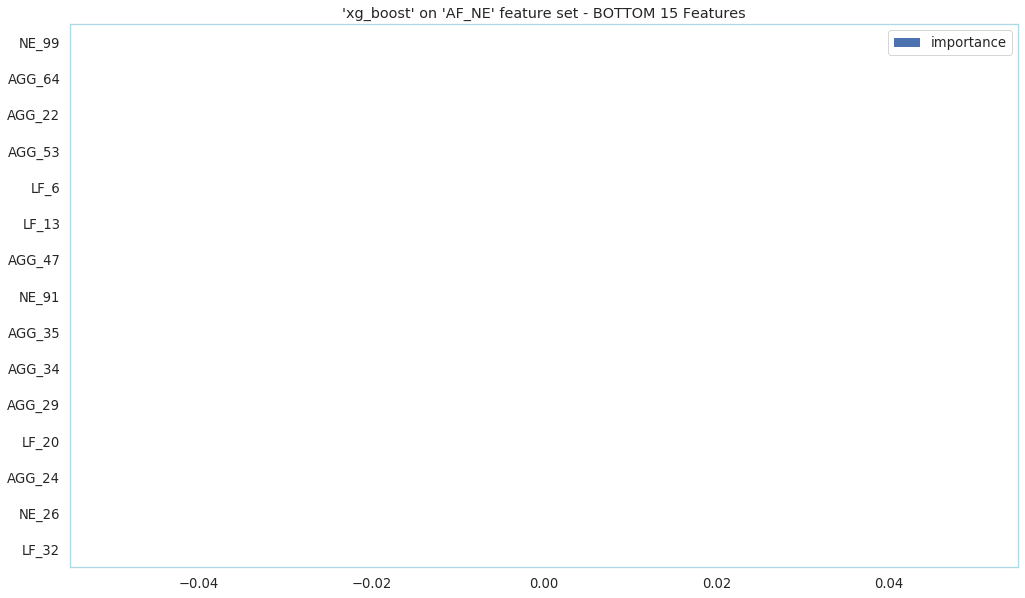

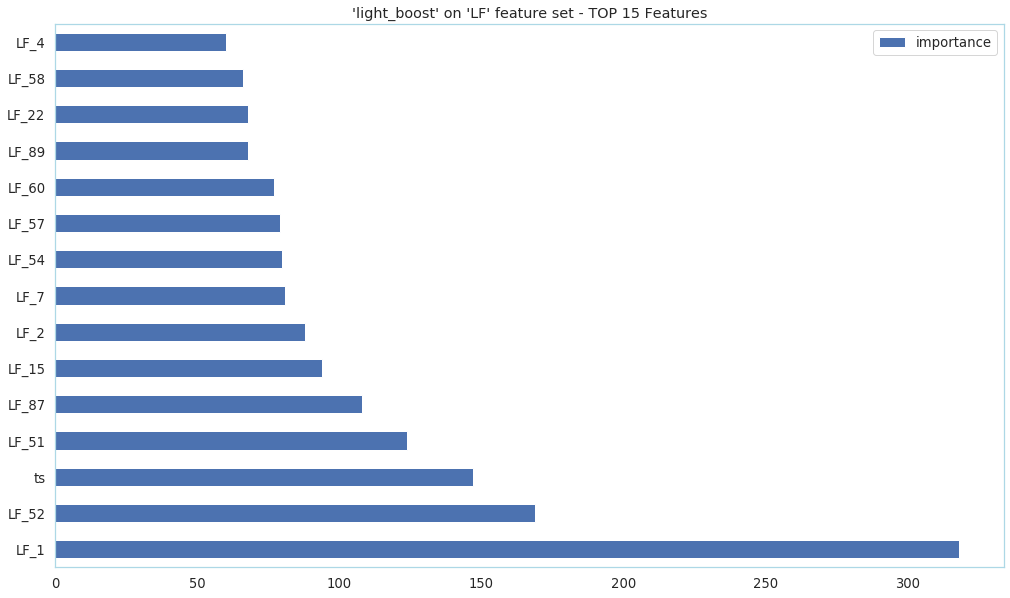

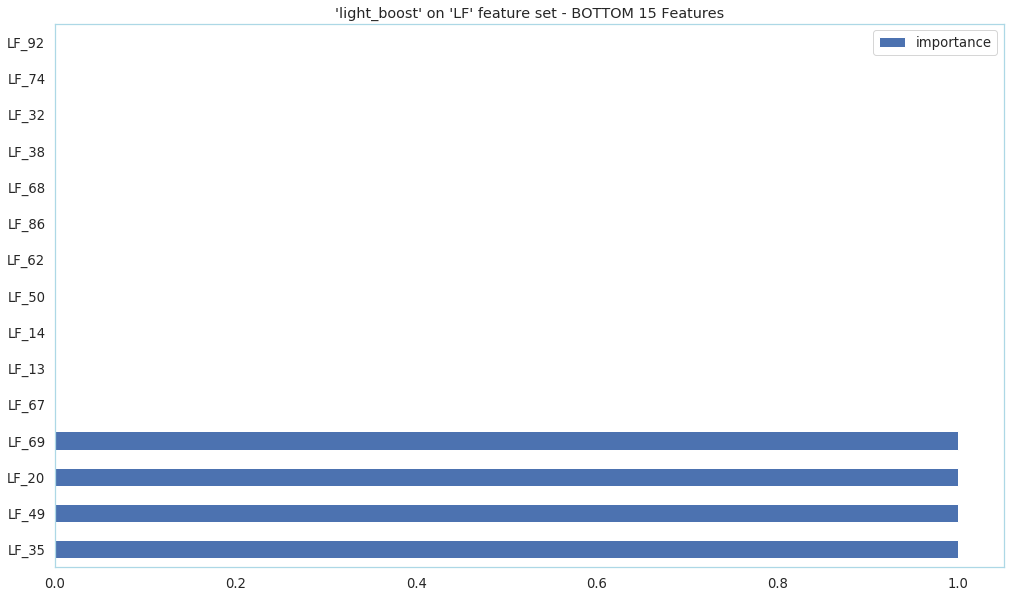

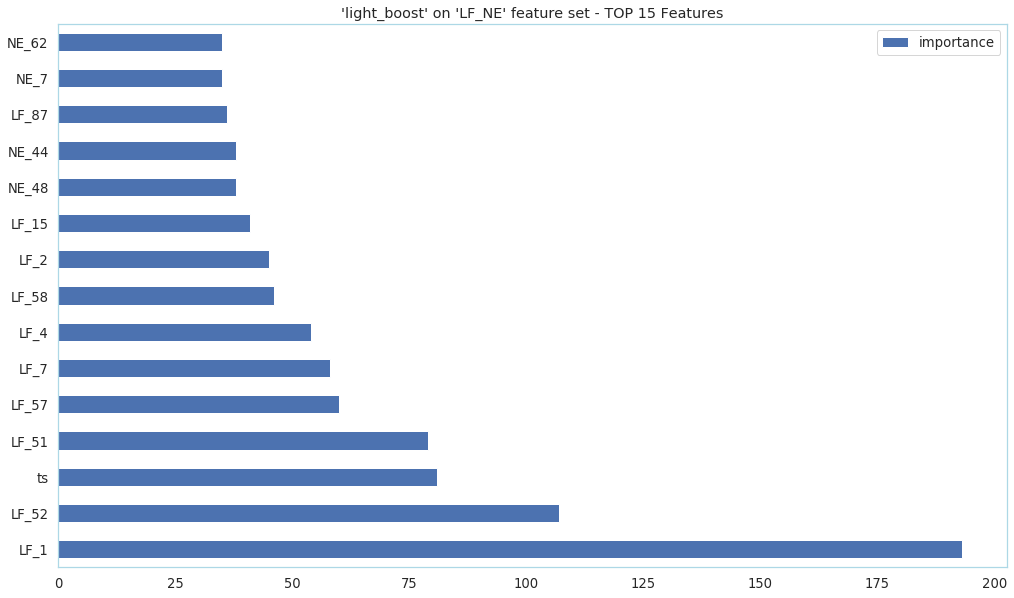

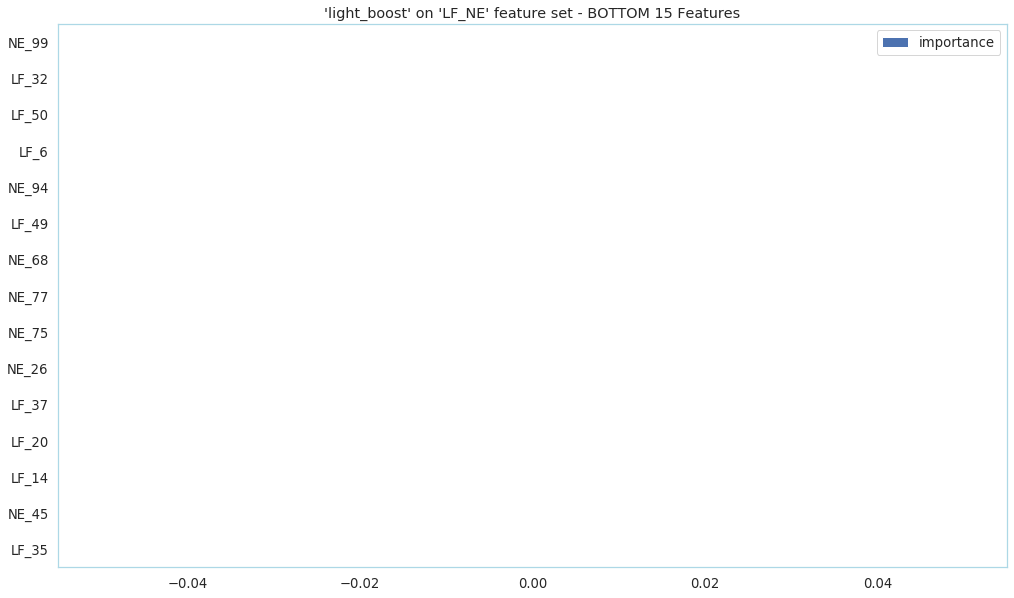

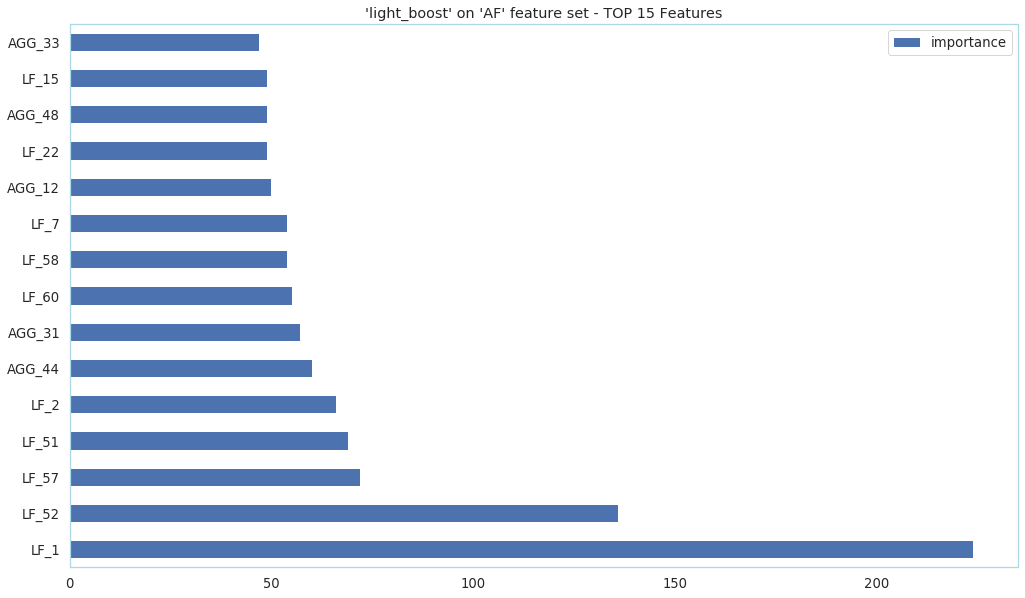

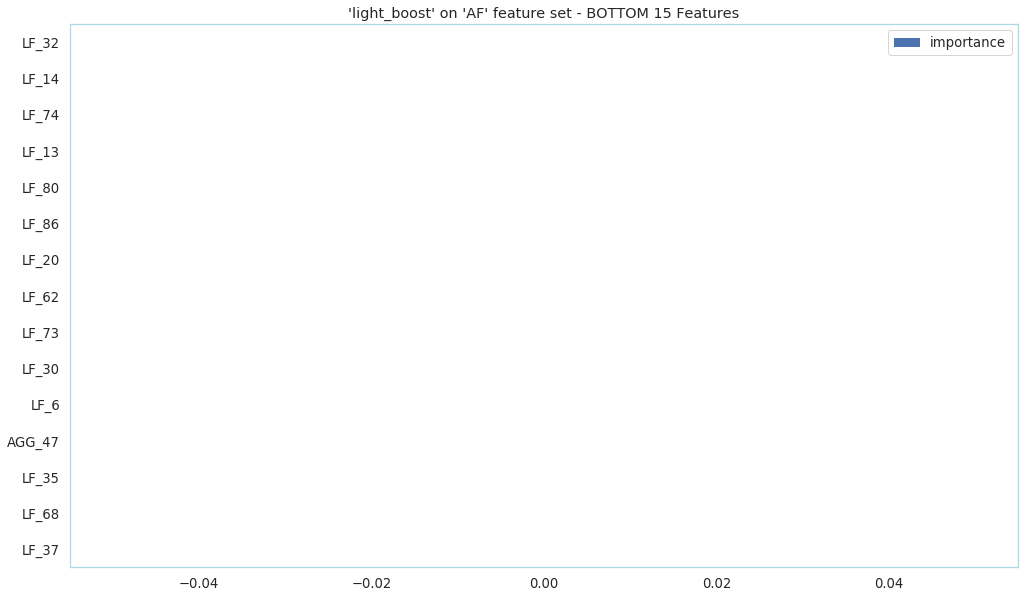

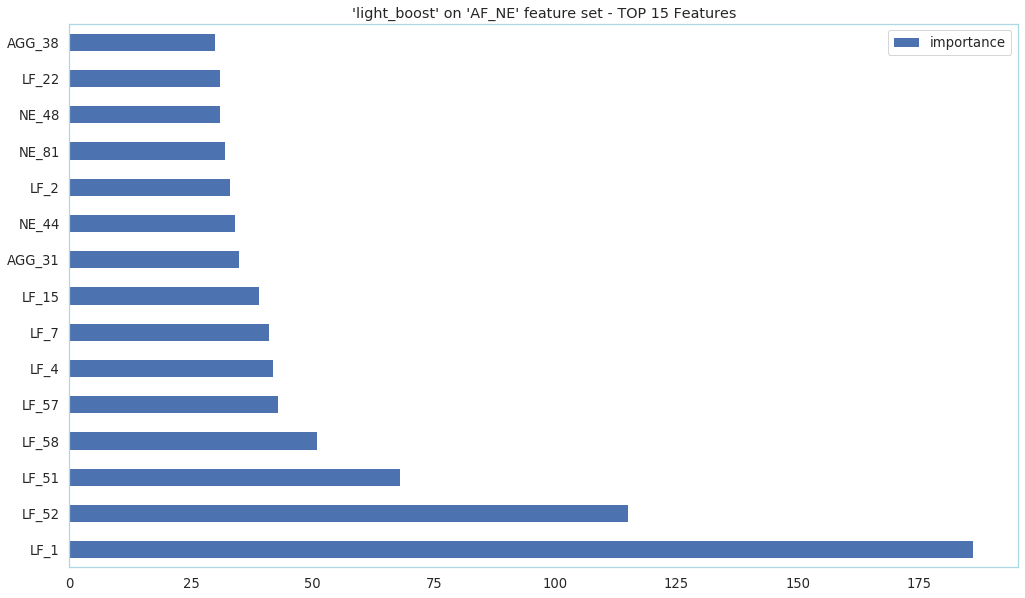

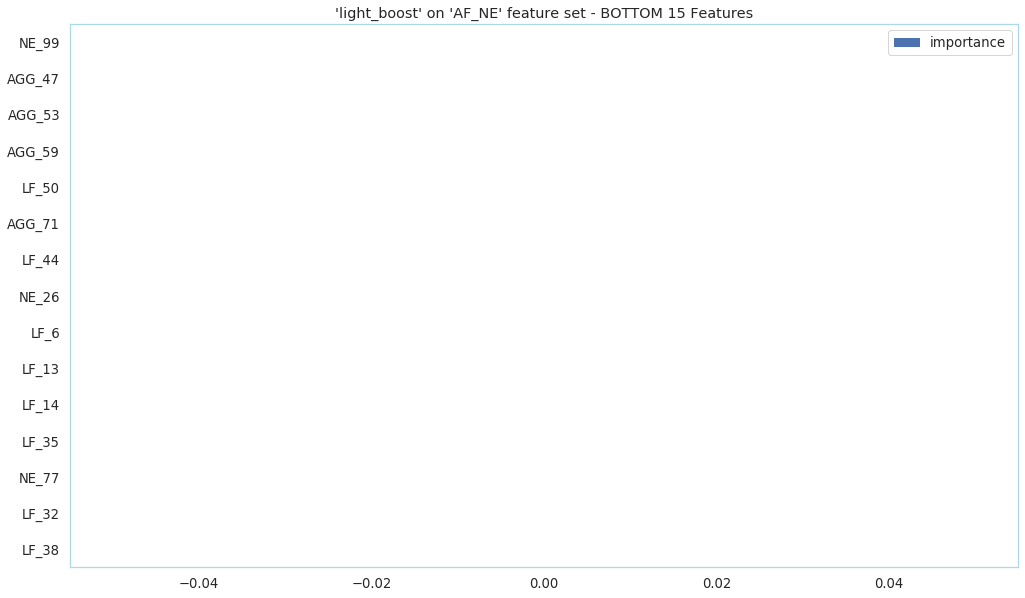

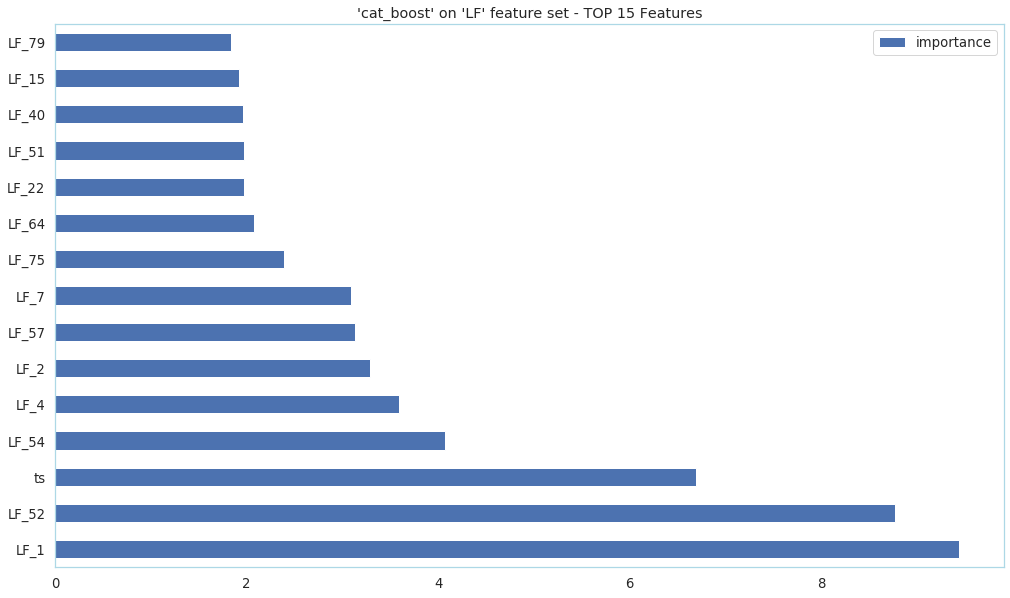

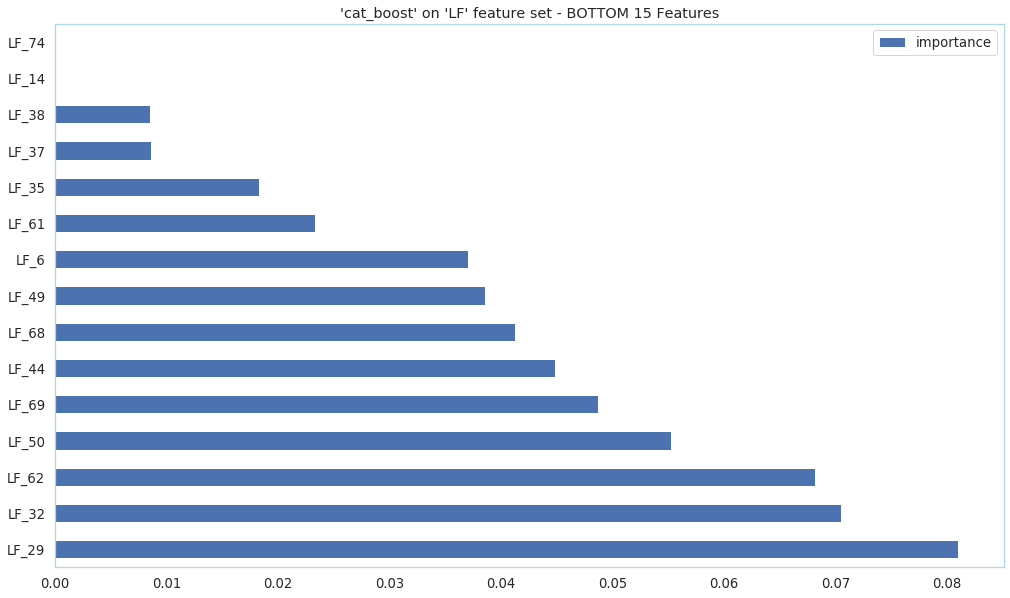

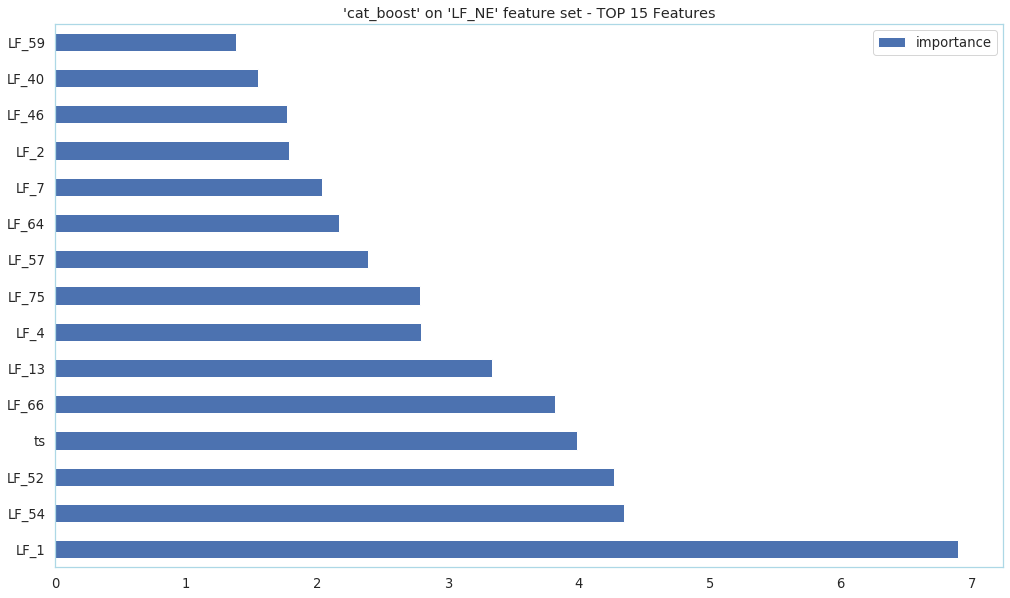

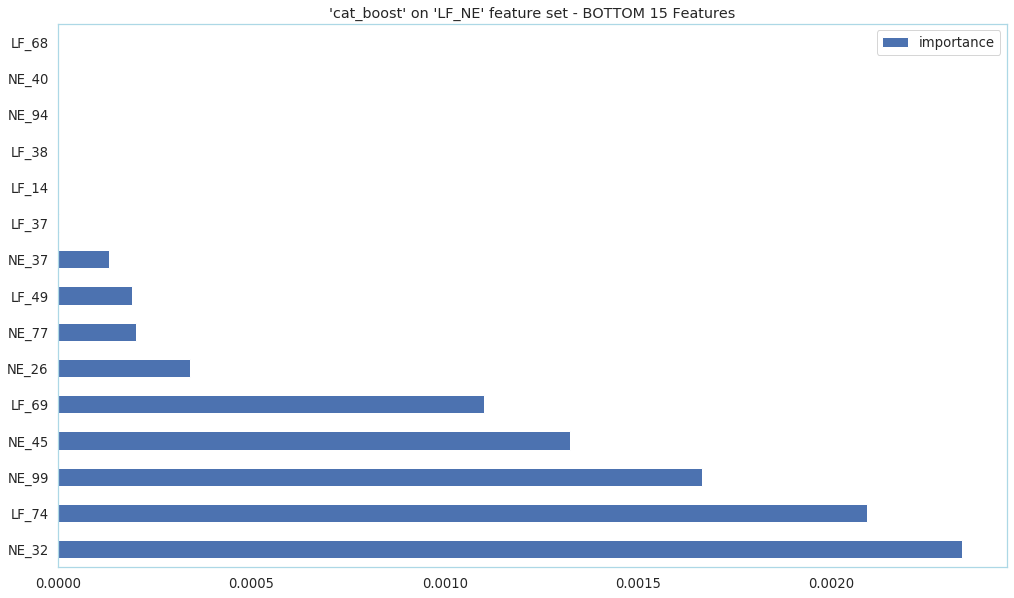

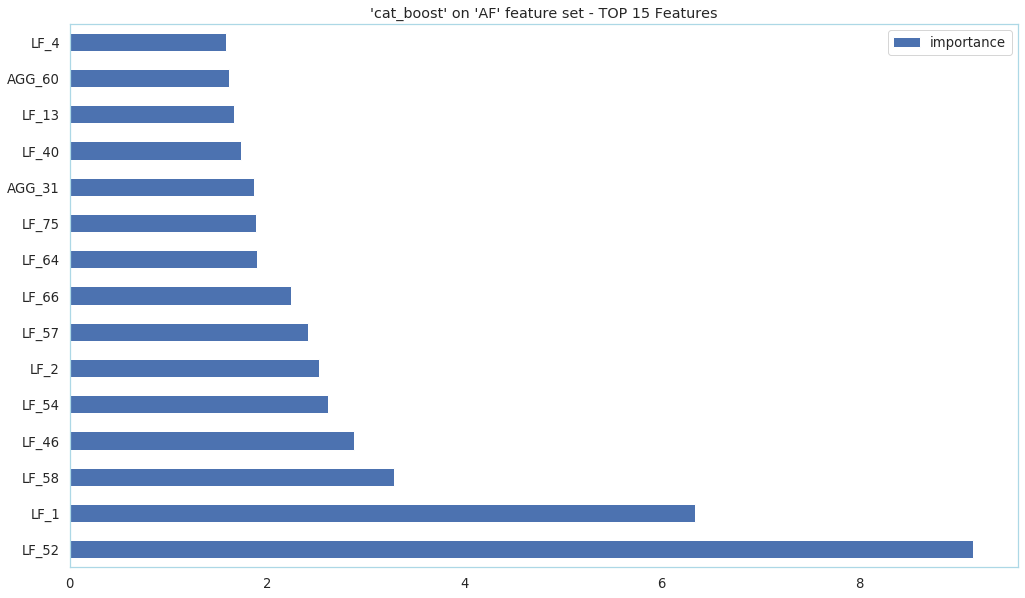

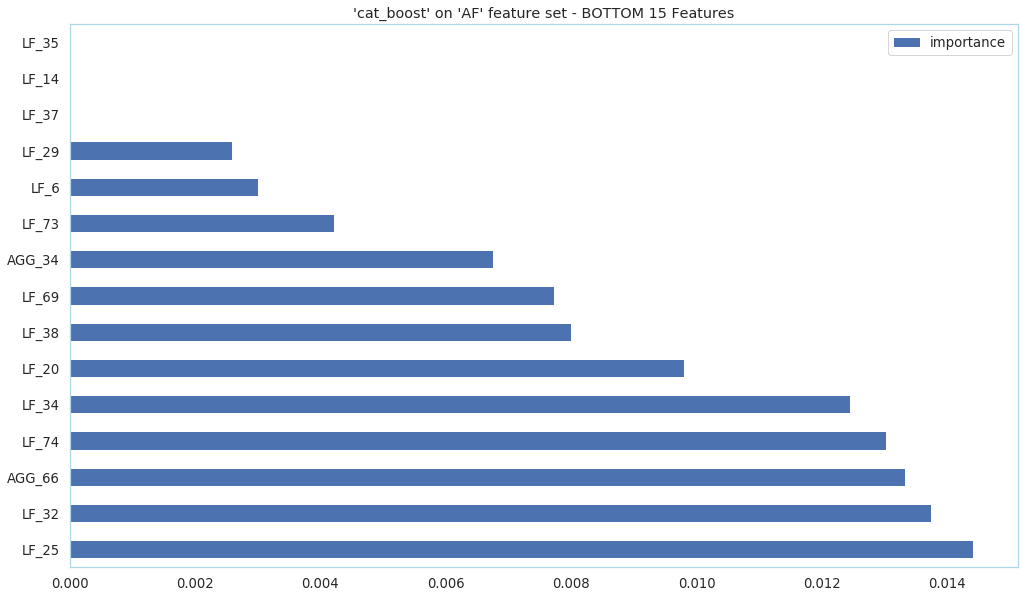

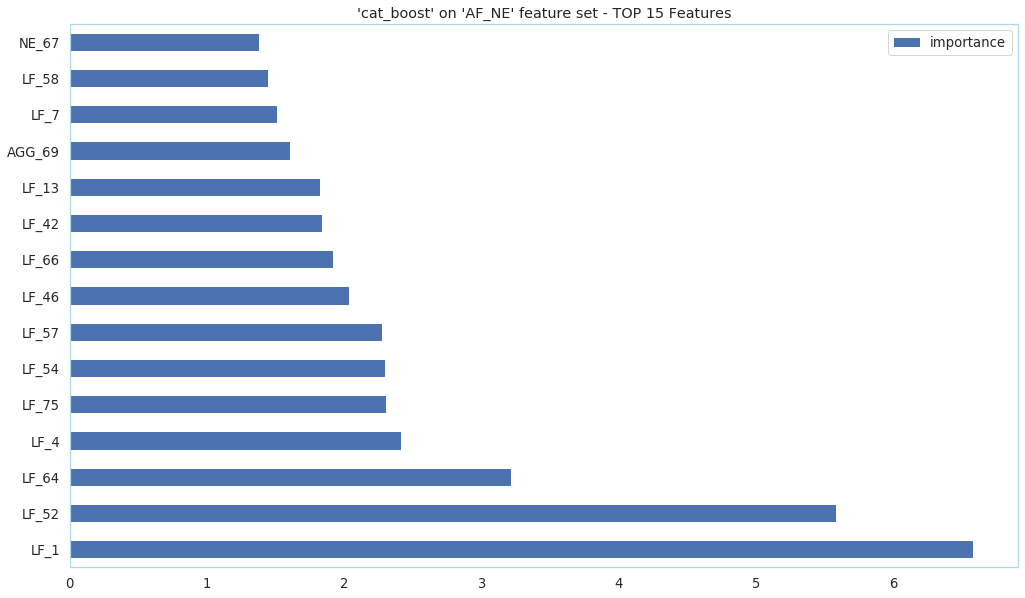

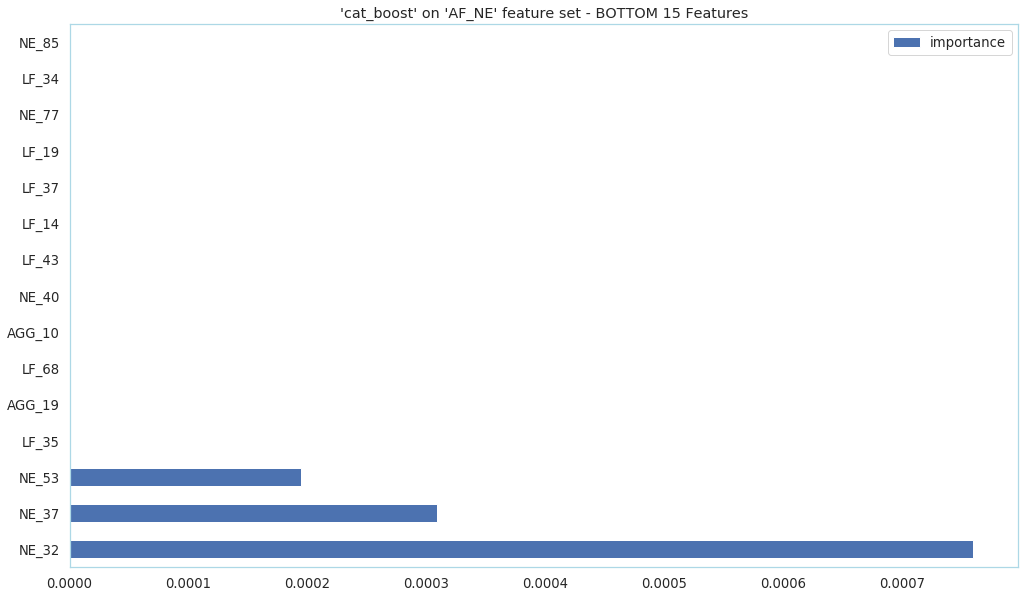

In [13]:
plot_feature_imp(default_results, N_features)

#### Boosting Default Hyperparameters - Hyperparameters

In [14]:
print_model_params(default_results)

Parameters used for 'xg_boost' on 'LF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 24,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'LF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 24,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 24,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 24,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'LF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': 24,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'LF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': 24,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'AF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': 24,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'AF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': 24,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'cat_boost' on 'LF' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.043954998254776,
    'loss_function': 'Logloss',
    'max_leaves': 64,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',

Parameters used for 'cat_boost' on 'LF_NE' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.043954998254776,
    'loss_function': 'Logloss',
    'max_leaves': 64,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosin

Parameters used for 'cat_boost' on 'AF' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.043954998254776,
    'loss_function': 'Logloss',
    'max_leaves': 64,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',

Parameters used for 'cat_boost' on 'AF_NE' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.043954998254776,
    'loss_function': 'Logloss',
    'max_leaves': 64,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosin

### Boosting Algorithms - Tuned Hyperparameters 

In [15]:
tuned_results = read_pickle(TUNED_RESULTS)

#### Boosting Tuned Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [16]:
# dataframe with all the perfomance metrics
print("Performance metrics for tuned boosting models")
tuned_metrics_df = results_table(tuned_results)
display(tuned_metrics_df)

# sorted by f1 score/home/delinvas/repos/aml-crypto-graph/src/cryptoaml/datareader/_elliptic_dr.py
print("Performance metrics for tuned boosting models sorted by f1-score")
display(tuned_metrics_df.sort_values("f1", ascending=False))

Performance metrics for tuned boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_LF,0.908,0.700,0.976,0.976,0.847,0.790
1,xg_boost_LF_NE,0.982,0.665,0.977,0.977,0.832,0.793
2,xg_boost_AF,0.921,0.732,0.978,0.978,0.864,0.815
3,xg_boost_AF_NE,0.986,0.692,0.979,0.979,0.846,0.813
4,light_boost_LF,0.888,0.702,0.975,0.975,0.848,0.784
5,light_boost_LF_NE,0.984,0.664,0.978,0.978,0.832,0.793
6,light_boost_AF,0.932,0.732,0.979,0.979,0.864,0.820
7,light_boost_AF_NE,0.985,0.695,0.979,0.979,0.847,0.815
8,cat_boost_LF,0.892,0.715,0.976,0.976,0.854,0.793
9,cat_boost_LF_NE,0.975,0.672,0.978,0.978,0.836,0.796


Performance metrics for tuned boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
6,light_boost_AF,0.932,0.732,0.979,0.979,0.864,0.820
10,cat_boost_AF,0.936,0.728,0.979,0.979,0.862,0.819
2,xg_boost_AF,0.921,0.732,0.978,0.978,0.864,0.815
7,light_boost_AF_NE,0.985,0.695,0.979,0.979,0.847,0.815
3,xg_boost_AF_NE,0.986,0.692,0.979,0.979,0.846,0.813
11,cat_boost_AF_NE,0.975,0.691,0.979,0.979,0.845,0.809
9,cat_boost_LF_NE,0.975,0.672,0.978,0.978,0.836,0.796
1,xg_boost_LF_NE,0.982,0.665,0.977,0.977,0.832,0.793
5,light_boost_LF_NE,0.984,0.664,0.978,0.978,0.832,0.793
8,cat_boost_LF,0.892,0.715,0.976,0.976,0.854,0.793


#### Boosting Tuned Hyperparameters - Confusion Matrices

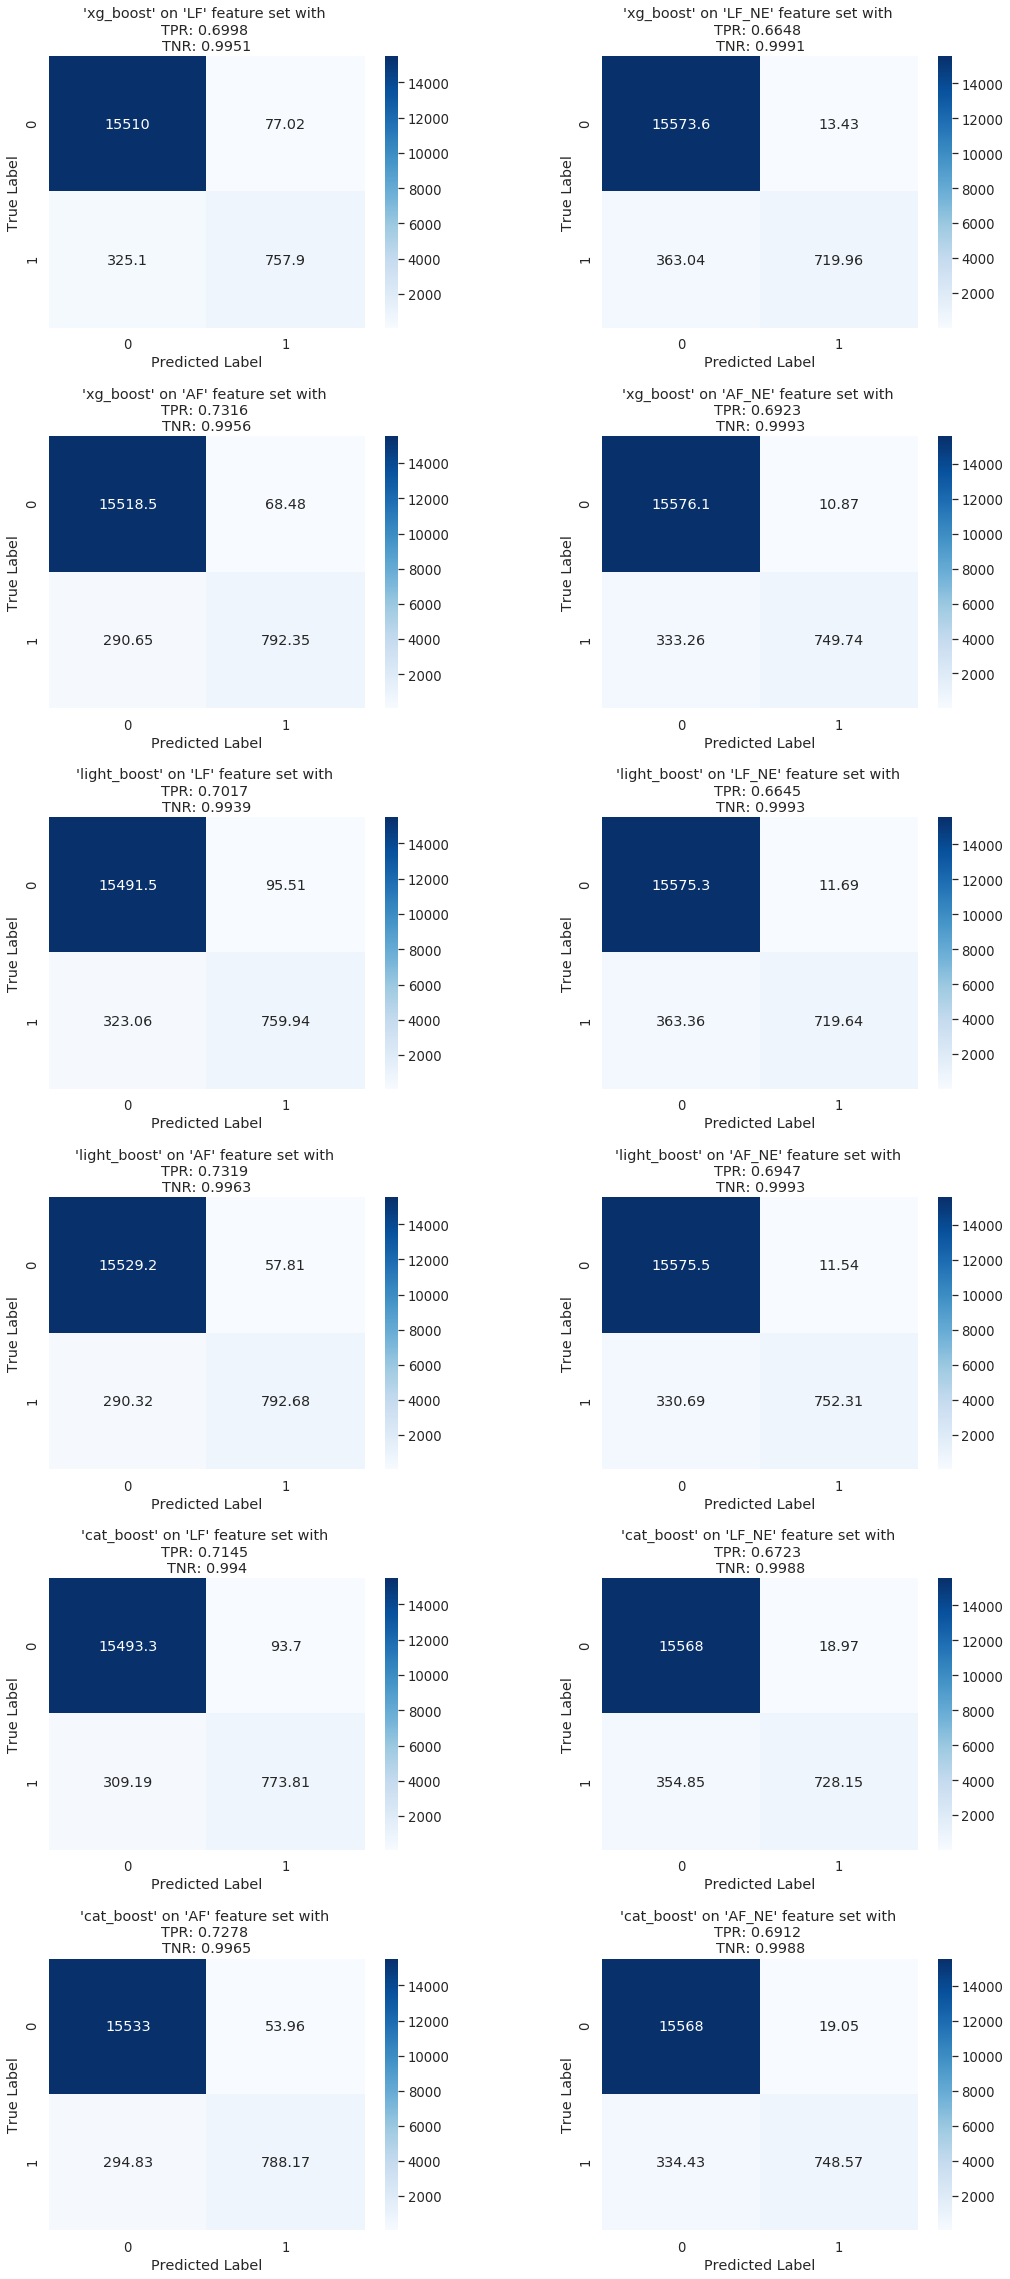

In [17]:
plot_result_matrices(tuned_results, figsize=(17,40))

#### Boosting Tuned Hyperparameters - F1 Results over Test Span

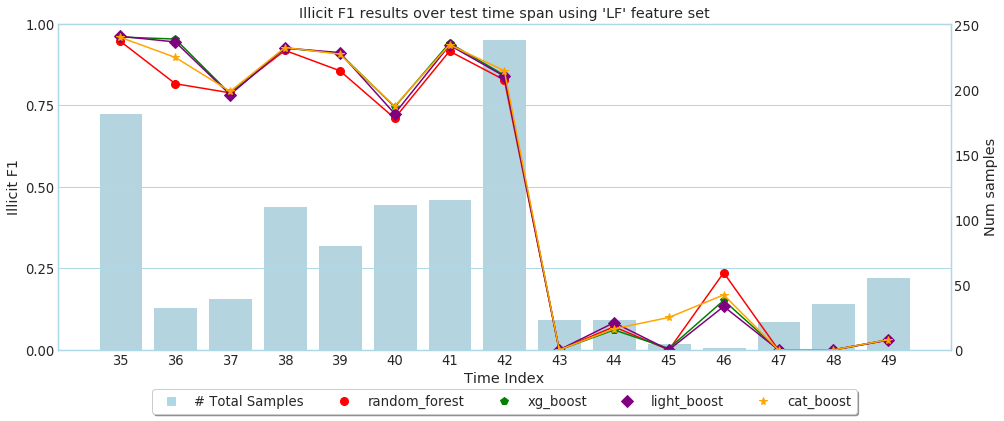

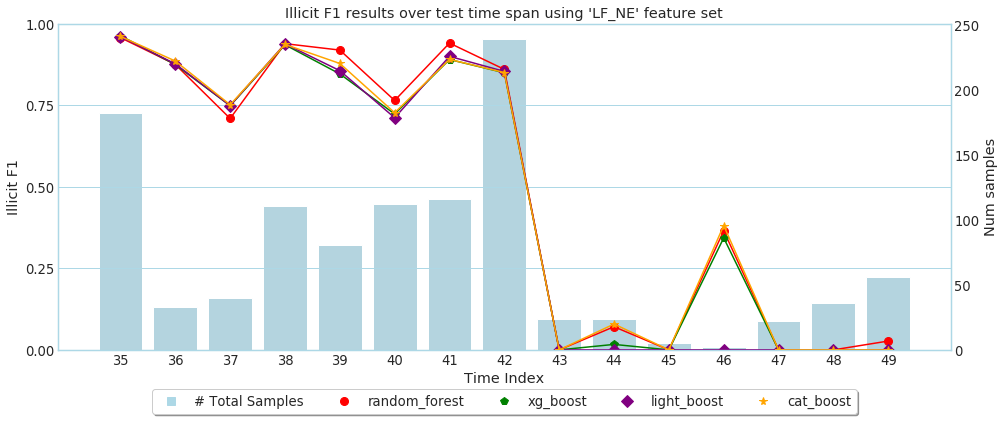

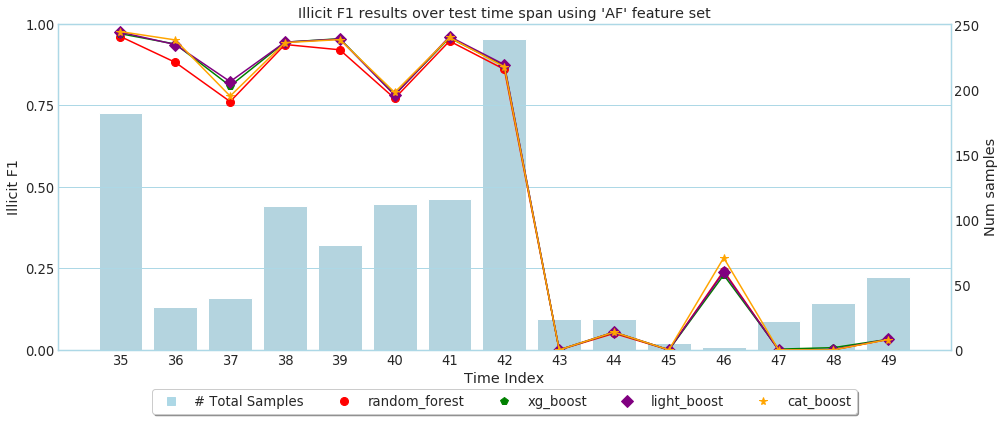

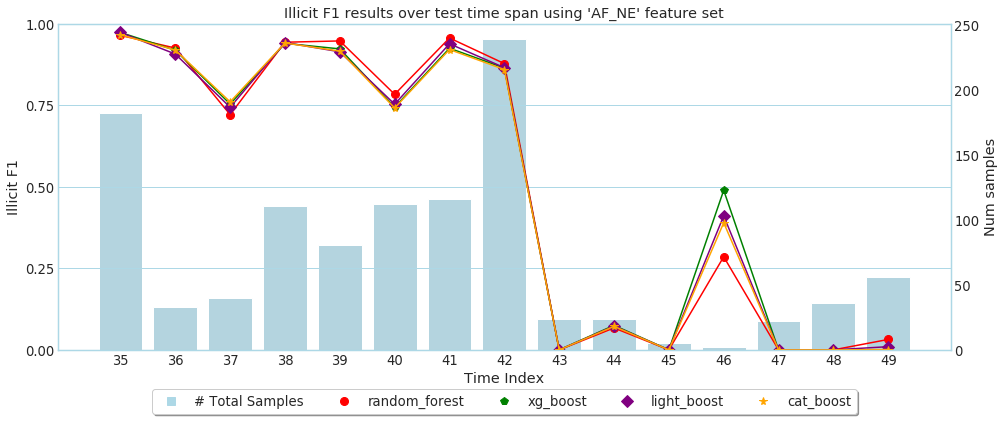

In [18]:
# in this plot we also display benchmark model
tmp_results = {**benchmark_results, **tuned_results}
elliptic_time_indexed_results(tmp_results)

#### Boosting Tuned Hyperparameters - Feature Importance

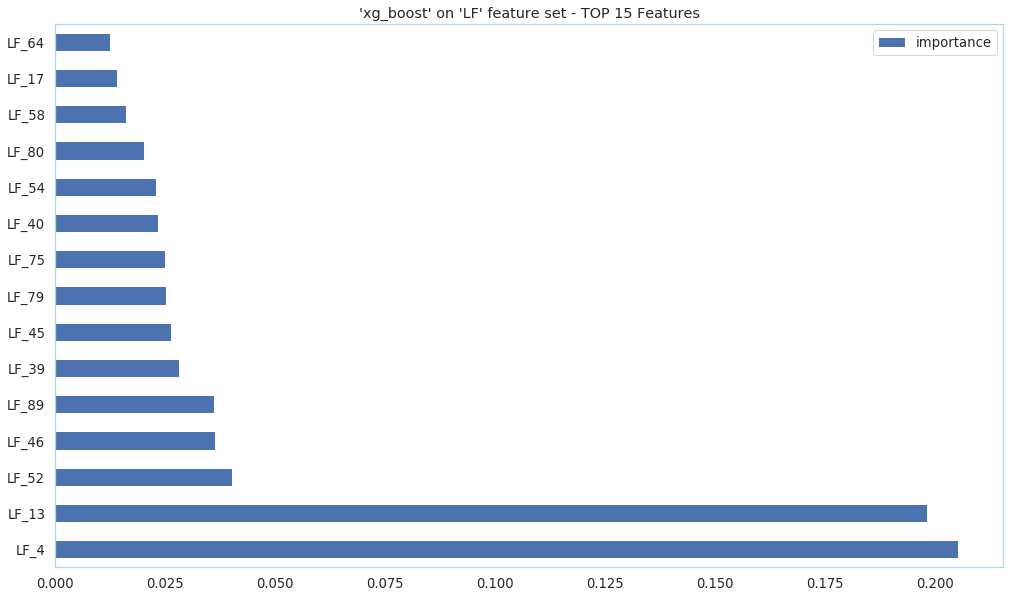

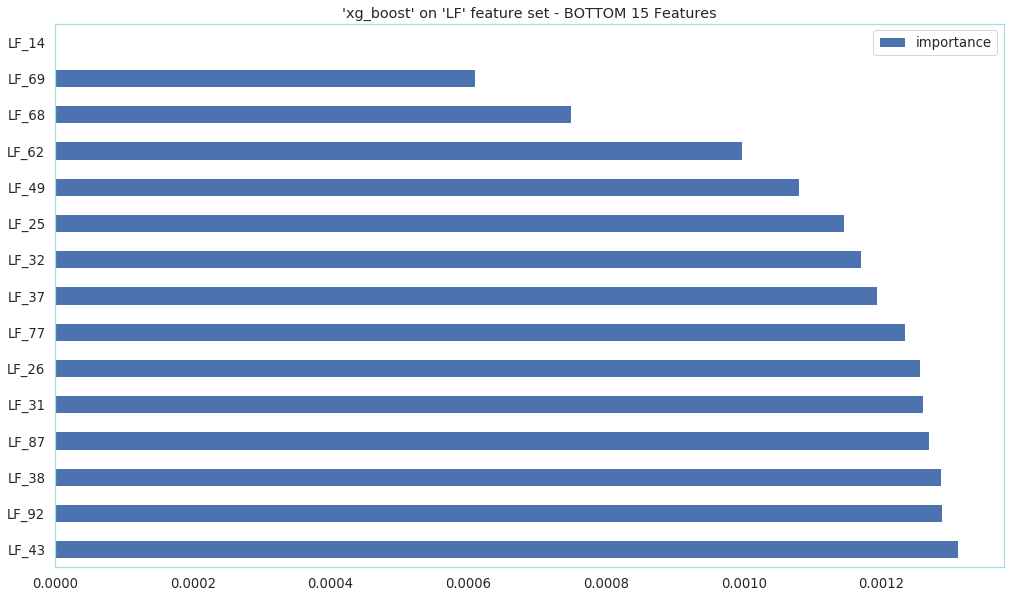

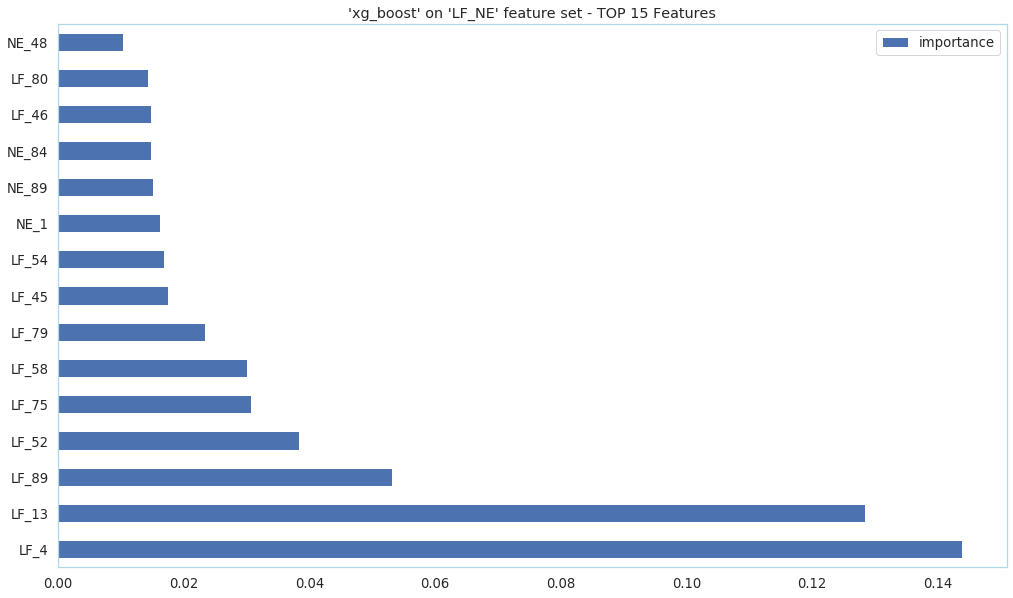

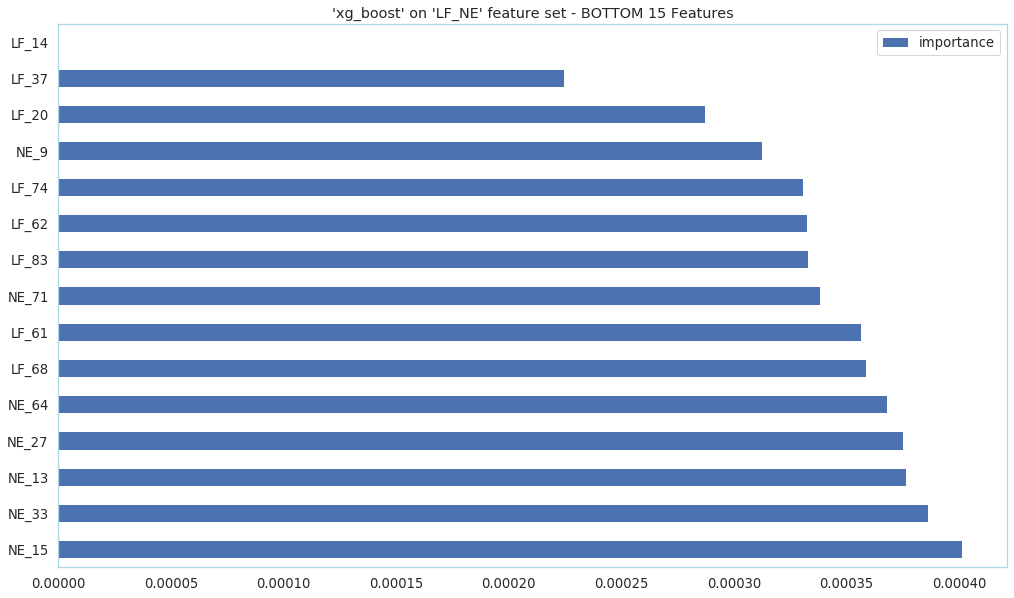

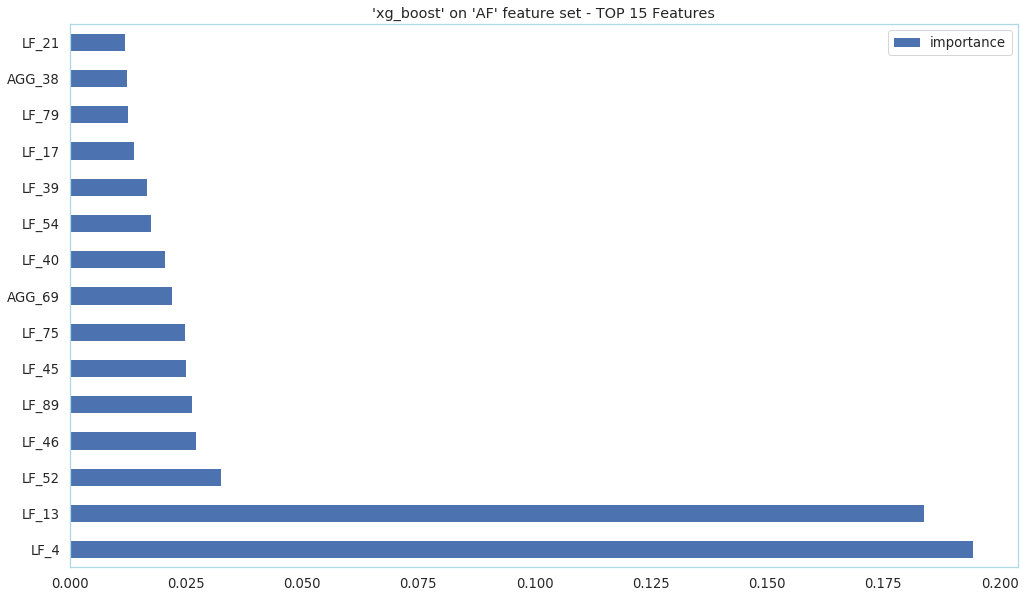

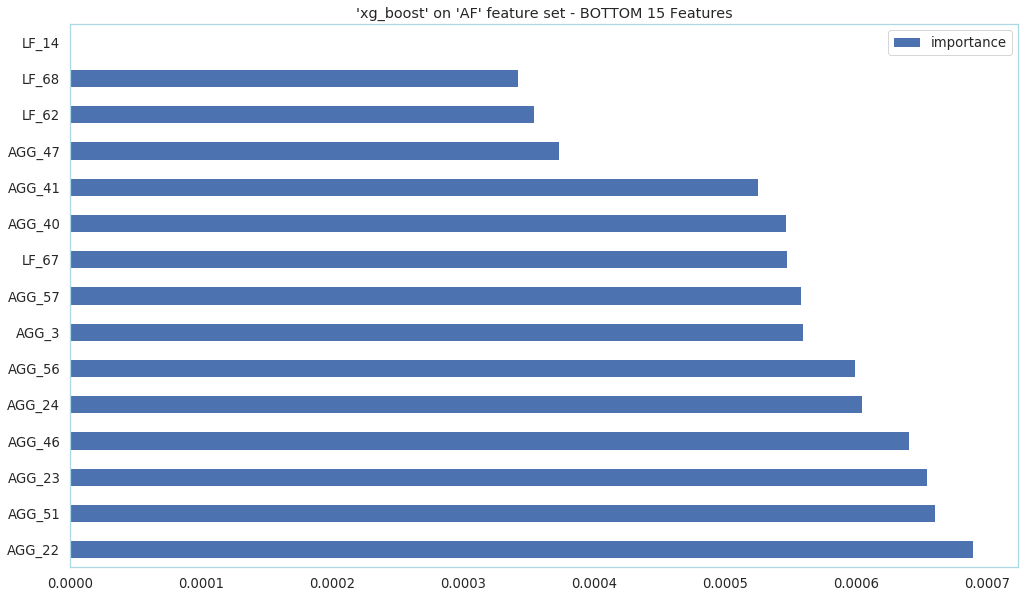

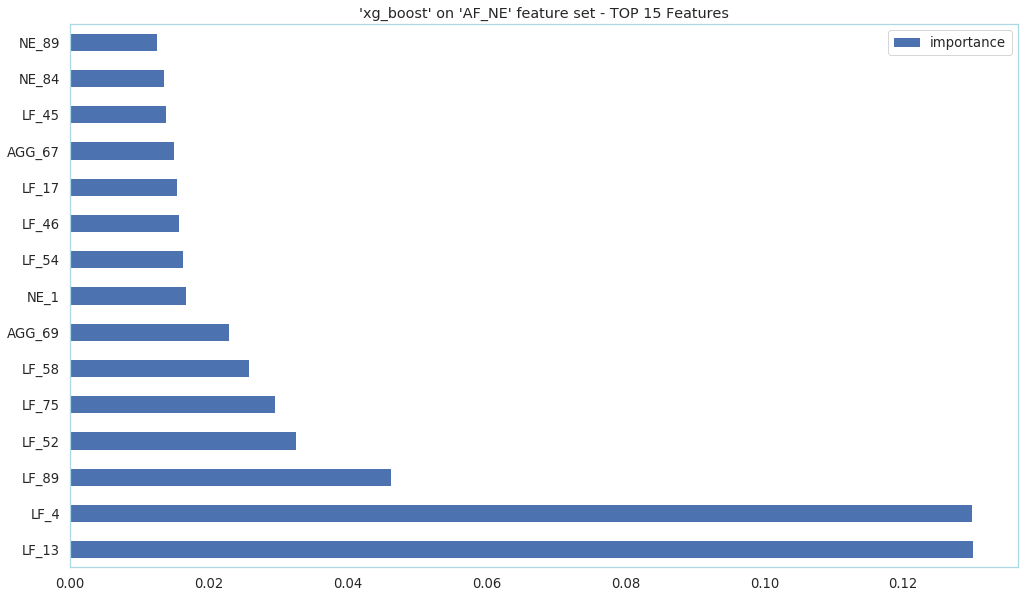

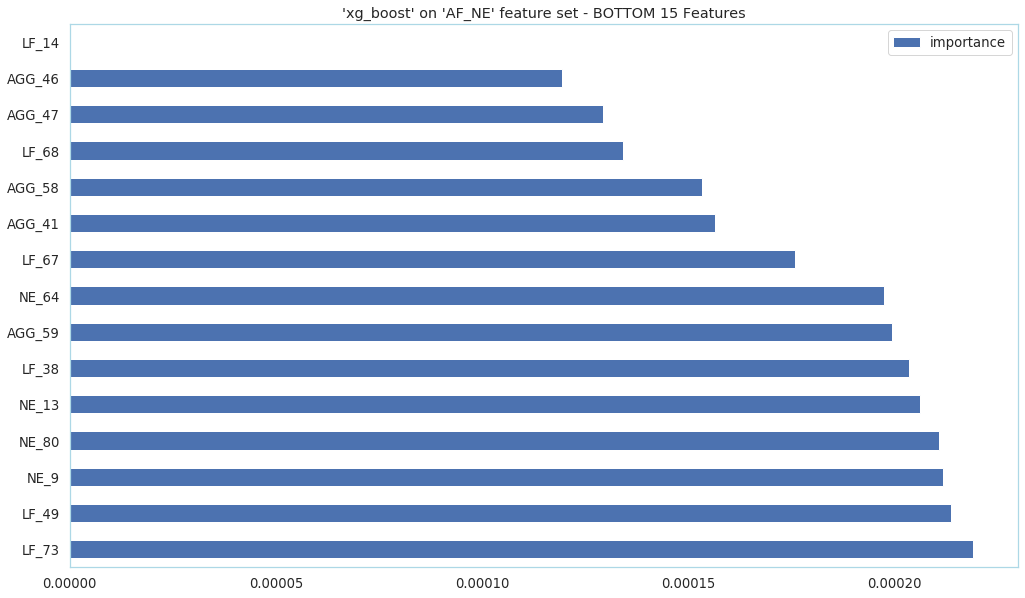

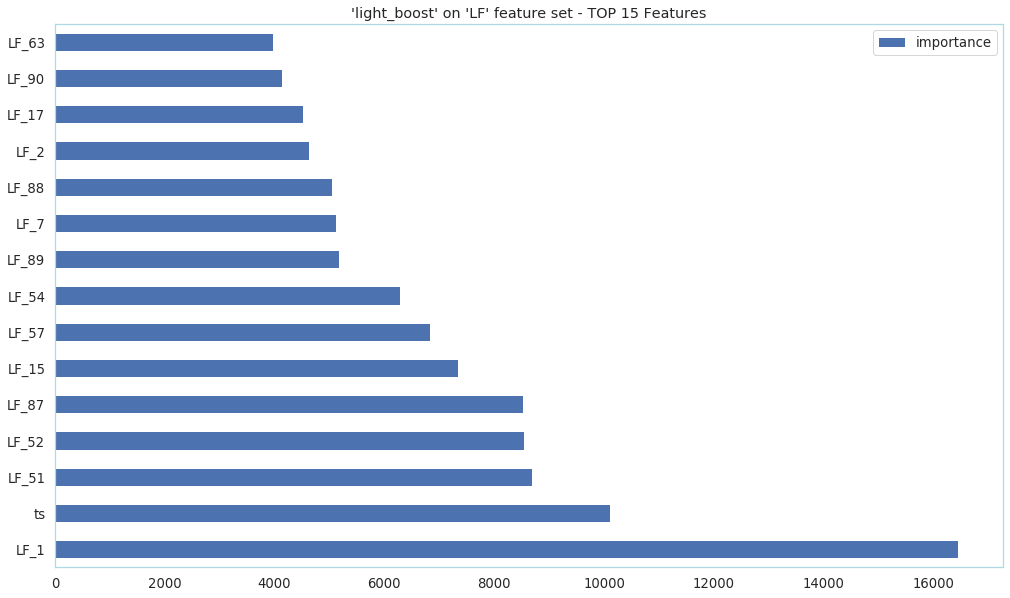

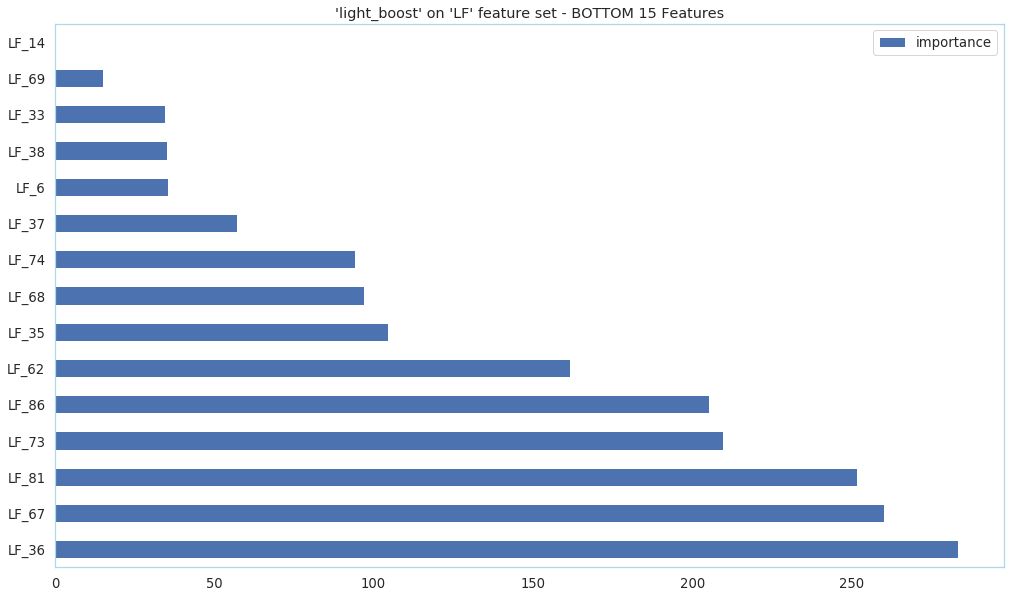

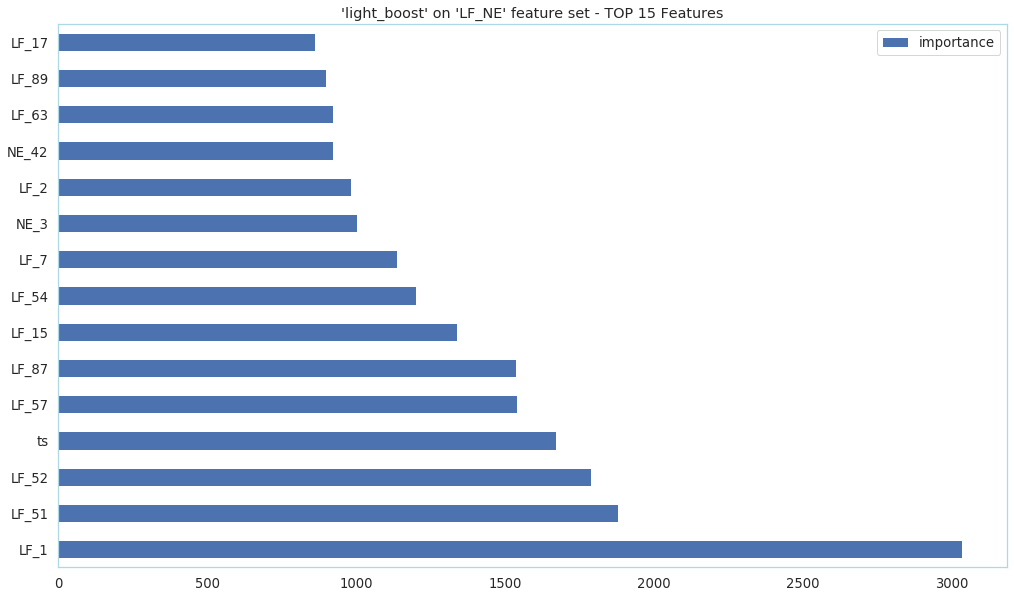

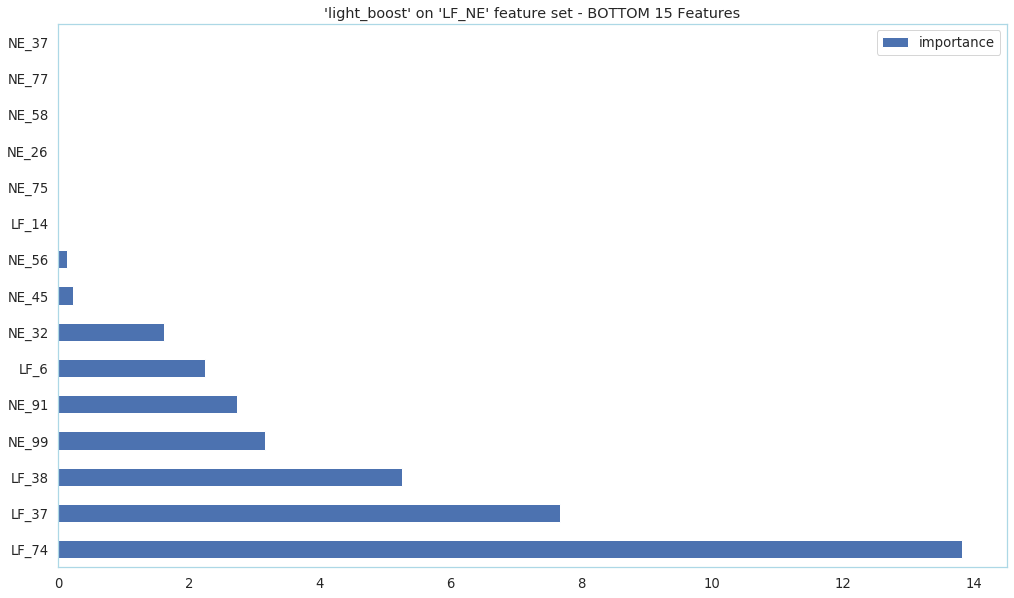

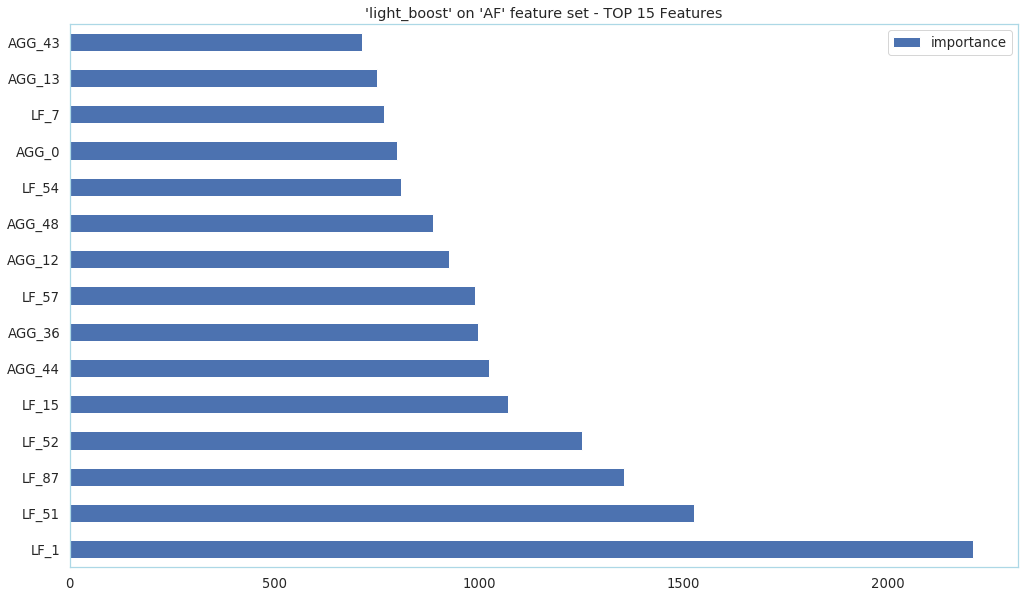

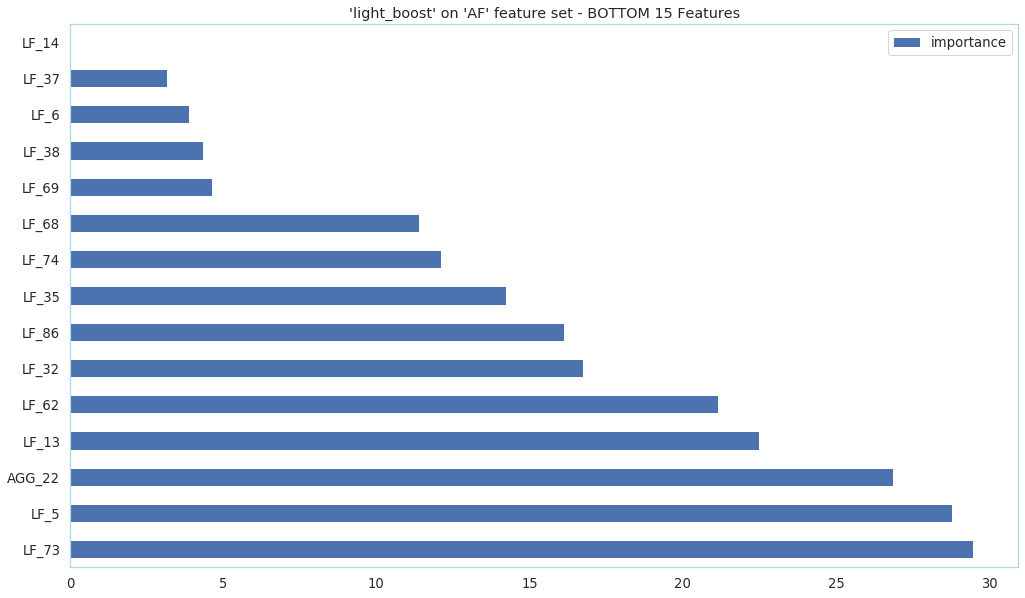

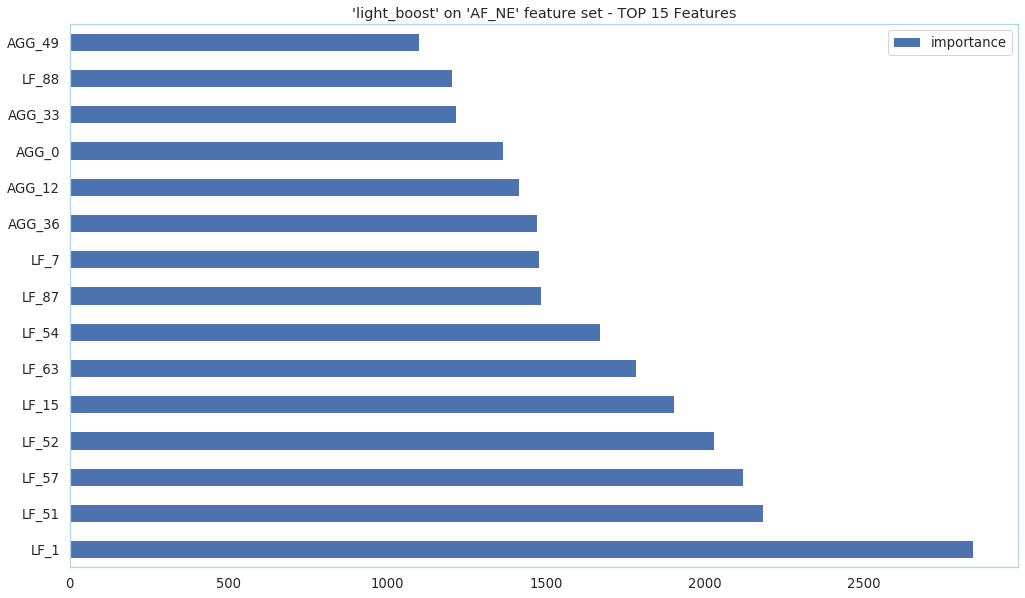

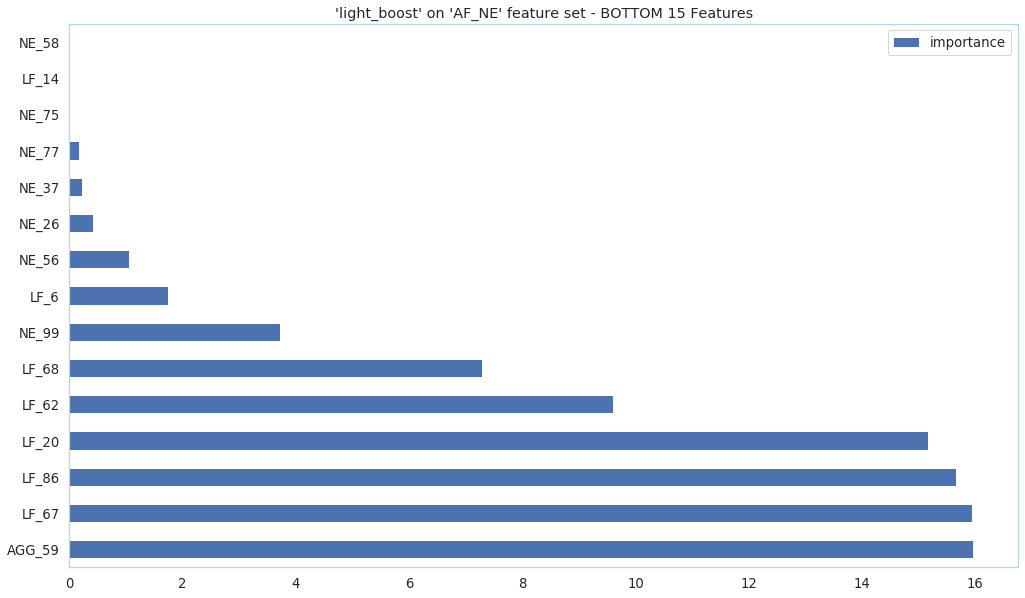

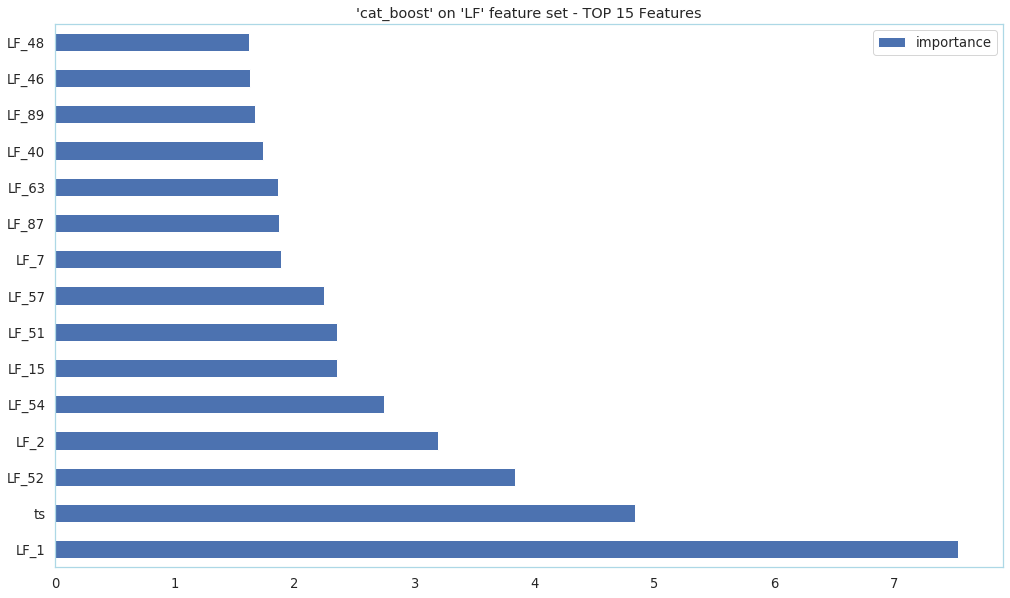

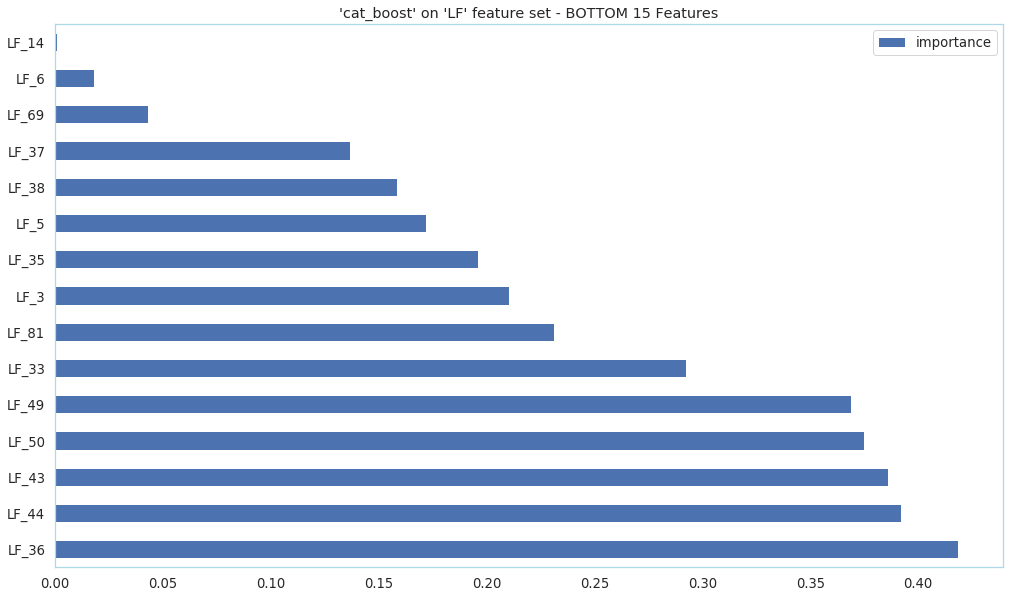

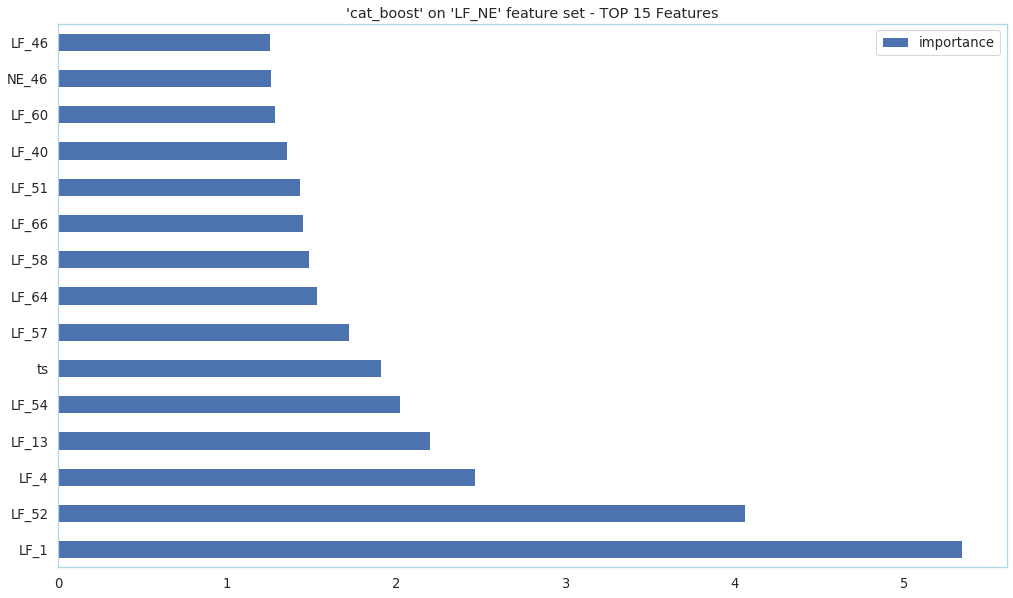

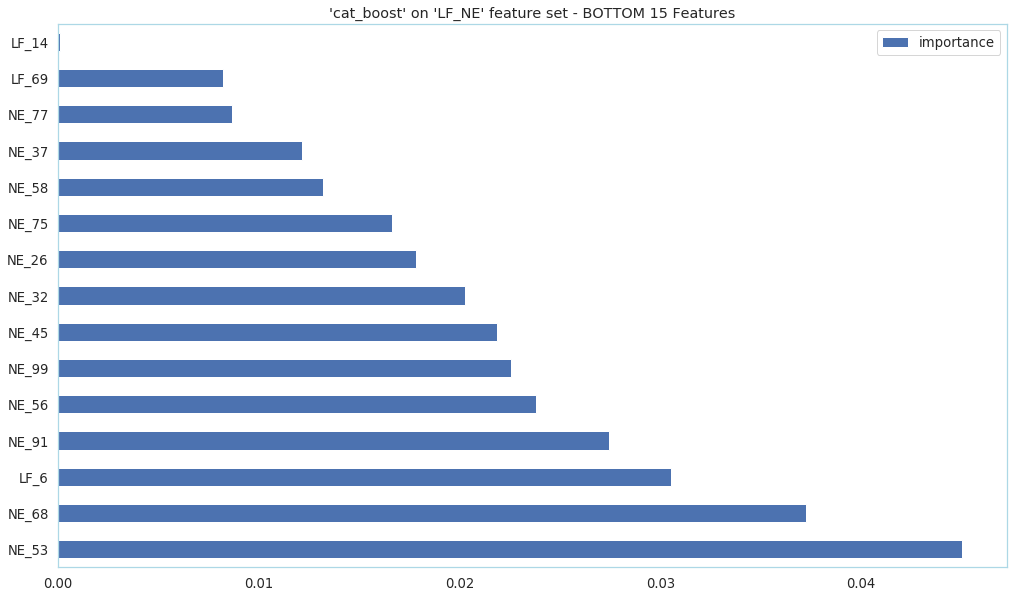

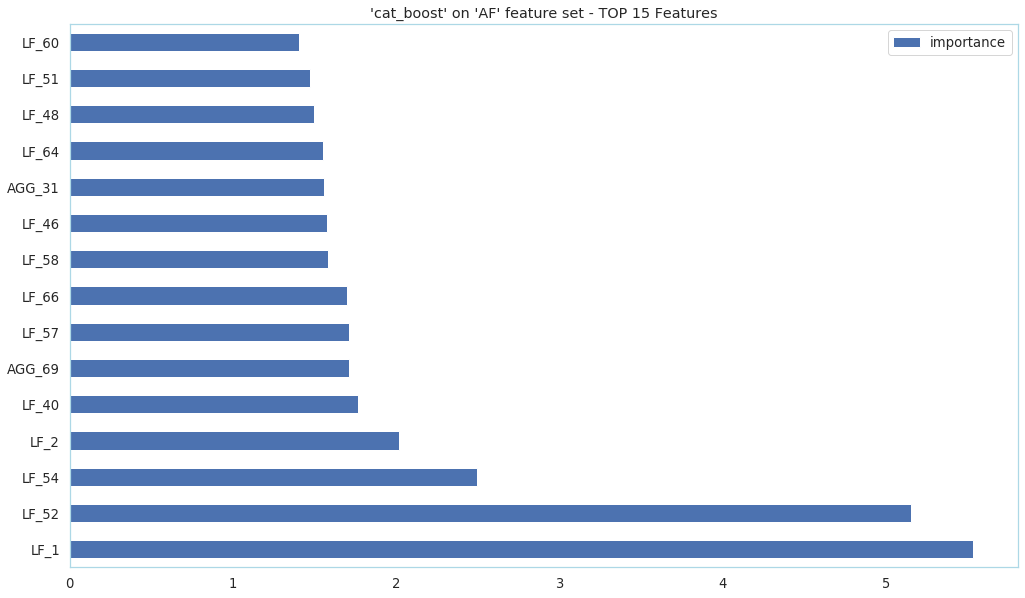

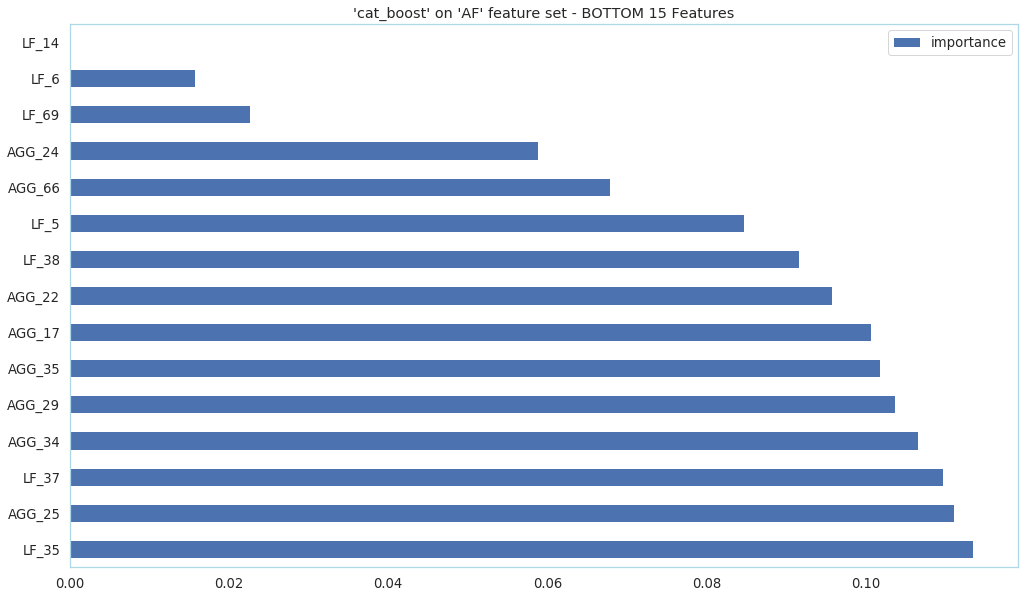

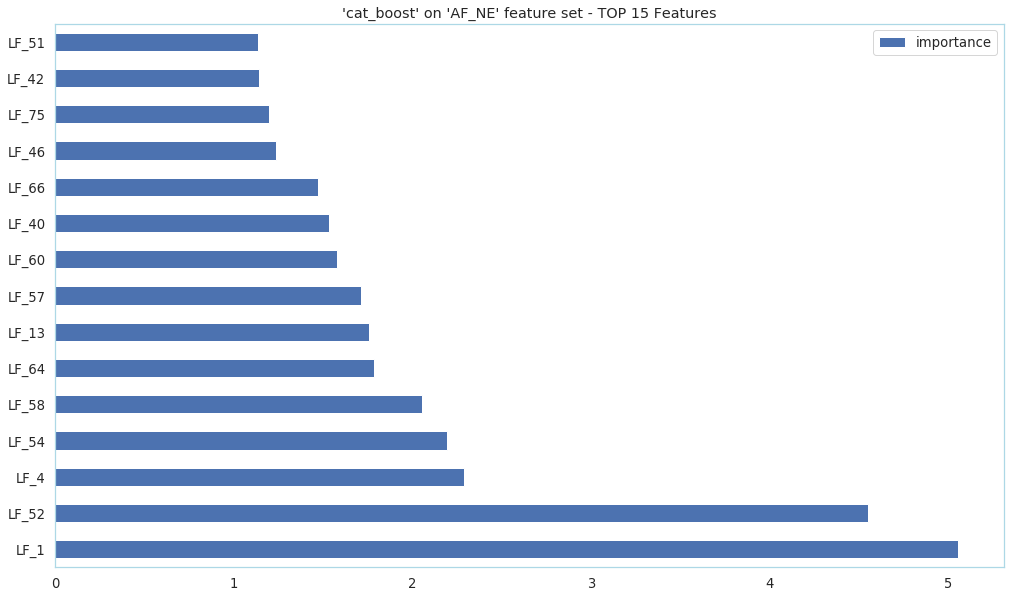

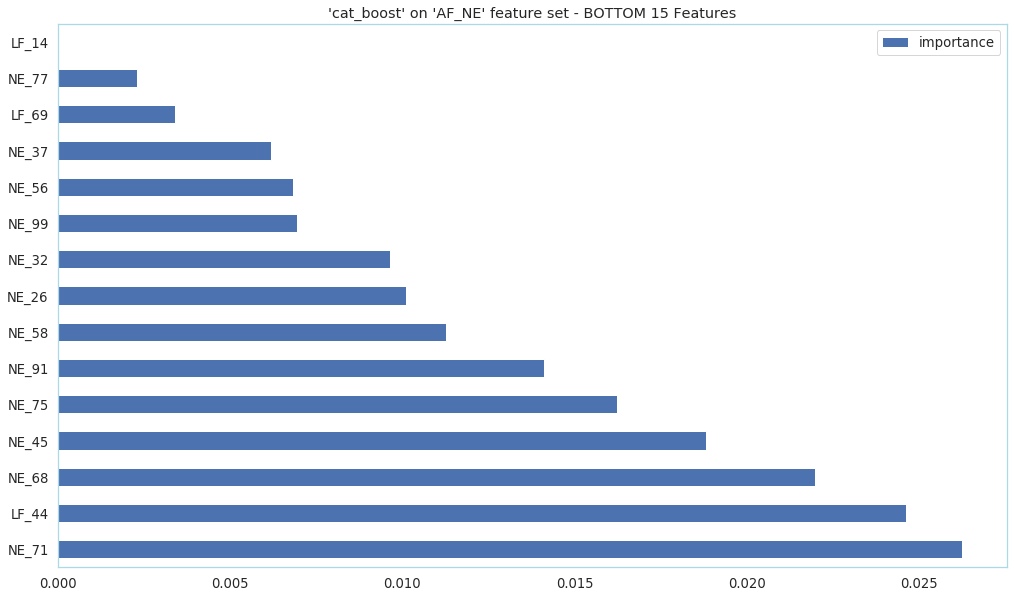

In [19]:
plot_feature_imp(tuned_results, N_features)

#### Boosting Tuned Hyperparameters - Hyperparameters

In [20]:
print_model_params(tuned_results)

Parameters used for 'xg_boost' on 'LF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 0.9168972013604229,
    'colsample_bynode': 1,
    'colsample_bytree': 0.6367700203690464,
    'gamma': 0.000878097449991818,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.050654853295849546,
    'max_delta_step': 0,
    'max_depth': 5,
    'min_child_weight': 1.1914420820435448e-06,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 1585,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 1.1044975415552232e-06,
    'reg_lambda': 2.3419129189402086e-05,
    'scale_pos_weight': 1,
    'subsample': 0.9317812643350265,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'LF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 0.9179800965039797,
    'colsample_bynode': 1,
    'colsample_bytree': 0.7960358287306276,
    'gamma': 1.2366784965997972e-06,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.04339929288335128,
    'max_delta_step': 0,
    'max_depth': 3,
    'min_child_weight': 0.0010558271063347655,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 4885,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0.00020086090356417362,
    'reg_lambda': 7.11326230069552e-07,
    'scale_pos_weight': 1,
    'subsample': 0.743276507002905,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 0.6399663301477401,
    'colsample_bynode': 1,
    'colsample_bytree': 0.7610132807939545,
    'gamma': 1.4897607985369035e-05,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.17180405341332797,
    'max_delta_step': 0,
    'max_depth': 5,
    'min_child_weight': 0.021463723370857116,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 475,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0.00013176587726054908,
    'reg_lambda': 5.3824033197120364e-06,
    'scale_pos_weight': 1,
    'subsample': 0.7107204492692905,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 0.662579769175881,
    'colsample_bynode': 1,
    'colsample_bytree': 0.8625494671828154,
    'gamma': 0.0002974922404499394,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.07425551644920138,
    'max_delta_step': 0,
    'max_depth': 3,
    'min_child_weight': 5.725233439812487e-05,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 2561,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 3.440356098019968e-06,
    'reg_lambda': 0.009046739391051883,
    'scale_pos_weight': 1,
    'subsample': 0.8456188891447396,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'LF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.5867440901122031,
    'importance_type': 'split',
    'learning_rate': 0.005284256053565403,
    'max_depth': -1,
    'min_child_samples': 66,
    'min_child_weight': 0.014264760992663937,
    'min_split_gain': 0.0,
    'n_estimators': 3888,
    'n_jobs': -1,
    'num_leaves': 56,
    'objective': None,
    'random_state': 0,
    'reg_alpha': 0.00021668874539322757,
    'reg_lambda': 2.997329007143576e-05,
    'silent': True,
    'subsample': 0.9375299749093455,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'light_boost' on 'LF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.7538417724596406,
    'importance_type': 'split',
    'learning_rate': 0.02599555713447133,
    'max_depth': -1,
    'min_child_samples': 394,
    'min_child_weight': 0.0006913272092669252,
    'min_split_gain': 0.0,
    'n_estimators': 2233,
    'n_jobs': -1,
    'num_leaves': 802,
    'objective': None,
    'random_state': 0,
    'reg_alpha': 4.5653205753082604e-07,
    'reg_lambda': 1.7133163555853147e-05,
    'silent': True,
    'subsample': 0.8973858606222604,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'light_boost' on 'AF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.8806545920095481,
    'importance_type': 'split',
    'learning_rate': 0.04512826974883081,
    'max_depth': -1,
    'min_child_samples': 327,
    'min_child_weight': 4.3230516180285375e-05,
    'min_split_gain': 0.0,
    'n_estimators': 1036,
    'n_jobs': -1,
    'num_leaves': 359,
    'objective': None,
    'random_state': 0,
    'reg_alpha': 1.1165994854235954e-05,
    'reg_lambda': 2.4195307322425423e-05,
    'silent': True,
    'subsample': 0.9630402764474666,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'light_boost' on 'AF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.6478101618090795,
    'importance_type': 'split',
    'learning_rate': 0.09722424033543176,
    'max_depth': -1,
    'min_child_samples': 255,
    'min_child_weight': 8.479757535852648e-06,
    'min_split_gain': 0.0,
    'n_estimators': 4261,
    'n_jobs': -1,
    'num_leaves': 770,
    'objective': None,
    'random_state': 0,
    'reg_alpha': 1.3090333096292452e-07,
    'reg_lambda': 0.005951314850246193,
    'silent': True,
    'subsample': 0.6139853128533745,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'cat_boost' on 'LF' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 8,
    'eval_metric': 'F1',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 3407,
    'l2_leaf_reg': 3.609123468399048,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 7,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.09729275852441788,
    'loss_function': 'Logloss',
    'max_leaves': 256,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 18,
    'rsm': 0.3774999976158142,
    'sampling_frequency': 'PerTree',


Parameters used for 'cat_boost' on 'LF_NE' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 4,
    'eval_metric': 'F1',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 3766,
    'l2_leaf_reg': 1.000316858291626,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 8,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.027700575068593025,
    'loss_function': 'Logloss',
    'max_leaves': 16,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 20,
    'rsm': 0.4650000035762787,
    'sampling_frequency': 'PerTree

Parameters used for 'cat_boost' on 'AF' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 5,
    'eval_metric': 'F1',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 3915,
    'l2_leaf_reg': 1.466575026512146,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 7,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.03919879347085953,
    'loss_function': 'Logloss',
    'max_leaves': 32,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 12,
    'rsm': 0.8224999904632568,
    'sampling_frequency': 'PerTree',
 

Parameters used for 'cat_boost' on 'AF_NE' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 4,
    'eval_metric': 'F1',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 2203,
    'l2_leaf_reg': 1.1098747253417969,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 6,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.12073484808206558,
    'loss_function': 'Logloss',
    'max_leaves': 16,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 8,
    'rsm': 0.8700000047683716,
    'sampling_frequency': 'PerTree'

## References 

[1] Elliptic, www.elliptic.co.

[2] M. Weber, G. Domeniconi, J. Chen, D. K. I. Weidele, C. Bellei, T. Robinson, C. E. Leiserson, "Anti-Money Laundering in Bitcoin: Experimenting with Graph Convolutional Networks for Financial Forensics", KDD ’19 Workshop on Anomaly Detection in Finance, August 2019, Anchorage, AK, USA.

## Box-Plots

### LF - Precision

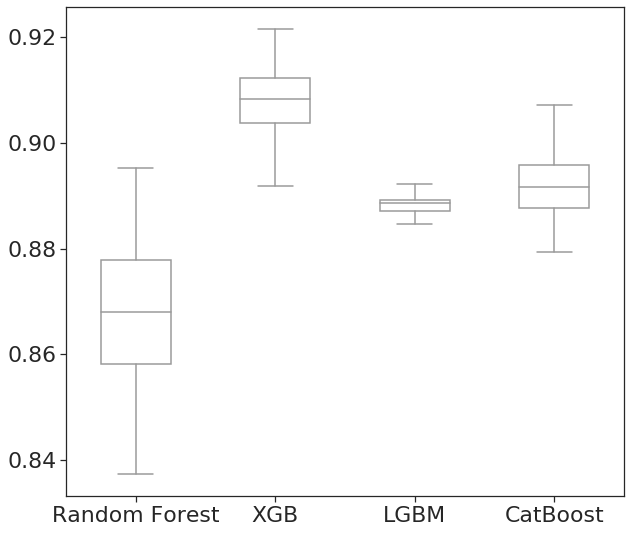

In [21]:
feature_set = "LF"
metric = "precision"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_lf_ell_boxplot_precision.png")

### LF - Recall

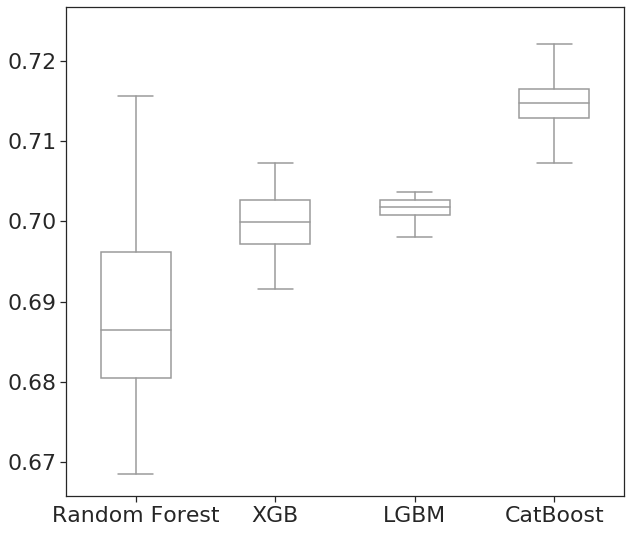

In [22]:
feature_set = "LF"
metric = "recall"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_lf_ell_boxplot_recall.png")

### LF - F1-Score

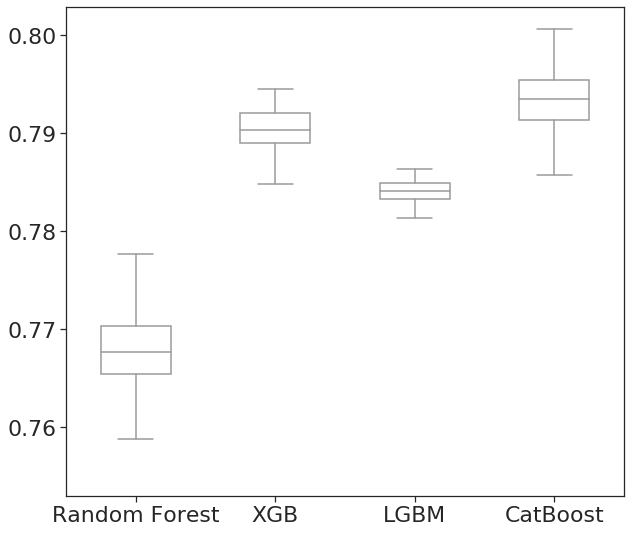

In [23]:
feature_set = "LF"
metric = "f1"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_lf_ell_boxplot_f1.png")

### LF_NE - Precision

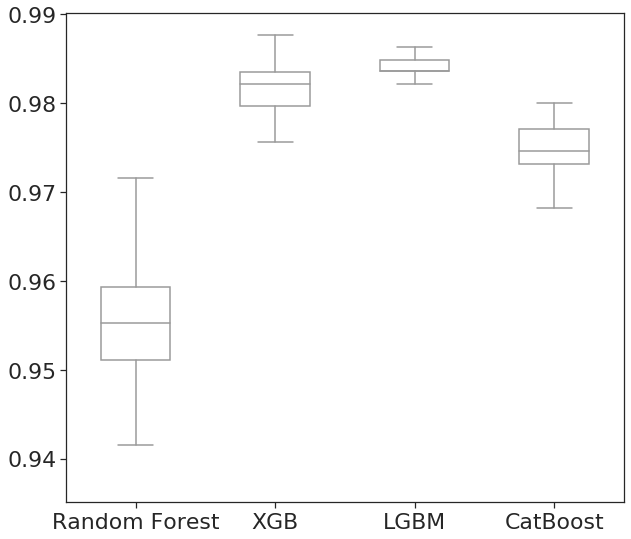

In [24]:
feature_set = "LF_NE"
metric = "precision"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_lfne_ell_boxplot_precision.png")

### LF_NE - Recall

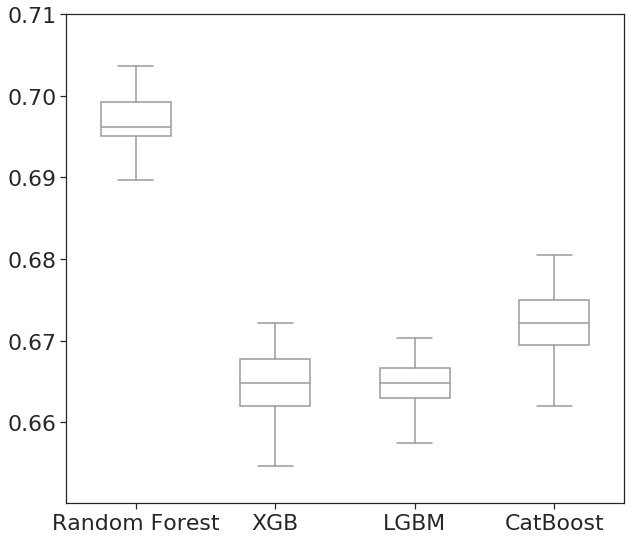

In [25]:
feature_set = "LF_NE"
metric = "recall"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_lfne_ell_boxplot_recall.png")

### LF_NE - F1-Score

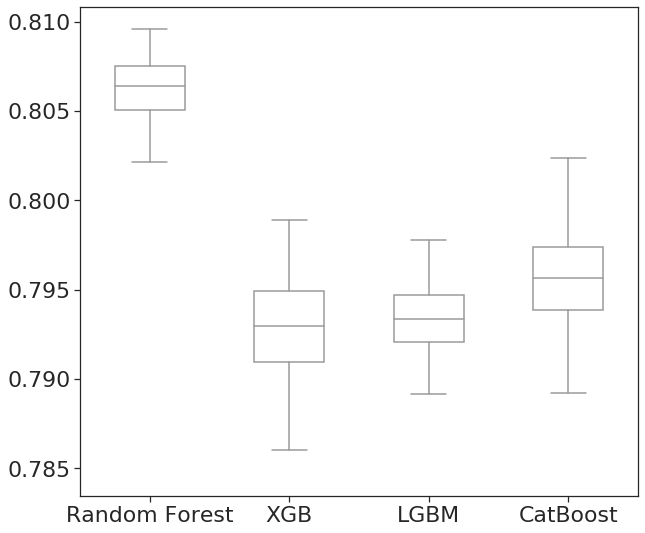

In [26]:
feature_set = "LF_NE"
metric = "f1"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_lfne_ell_boxplot_f1.png")

### AF - Precision

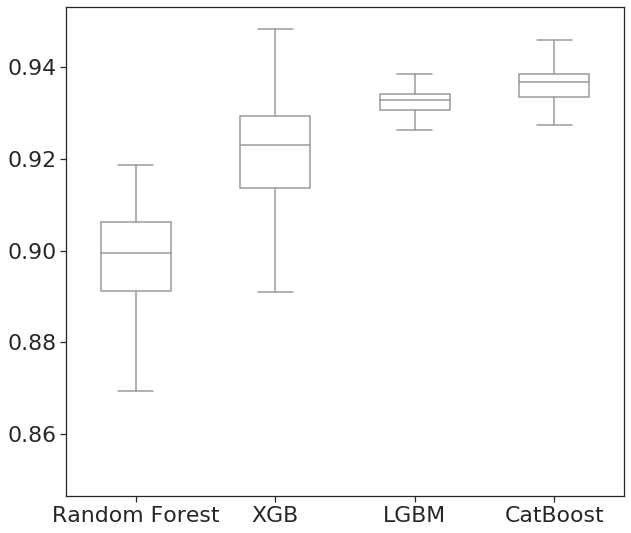

In [27]:
feature_set = "AF"
metric = "precision"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_af_ell_boxplot_precision.png")

### AF - Recall

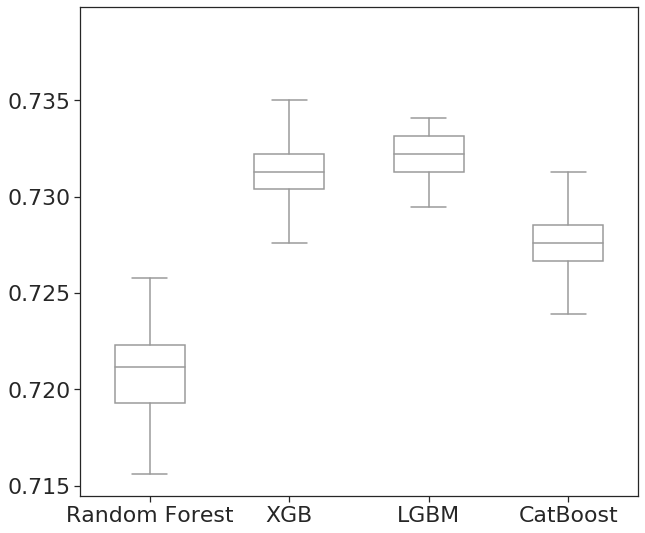

In [28]:
feature_set = "AF"
metric = "recall"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_af_ell_boxplot_recall.png")

### AF - F1

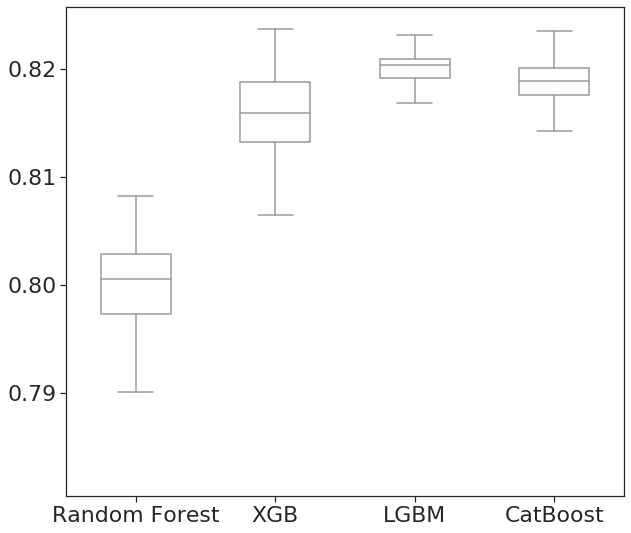

In [29]:
feature_set = "AF"
metric = "f1"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_af_ell_boxplot_f1.png")

### AF_NE - Precision

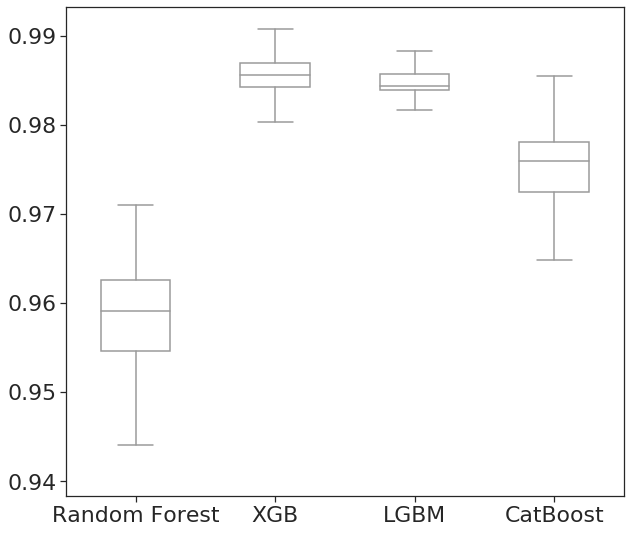

In [30]:
feature_set = "AF_NE"
metric = "precision"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_afne_ell_boxplot_precision.png")

### AF_NE - Recall

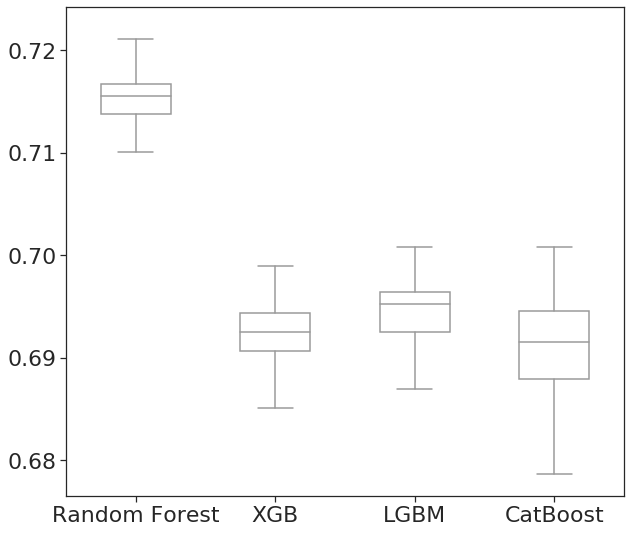

In [31]:
feature_set = "AF_NE"
metric = "recall"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_afne_ell_boxplot_recall.png")

### AF_NE - F1

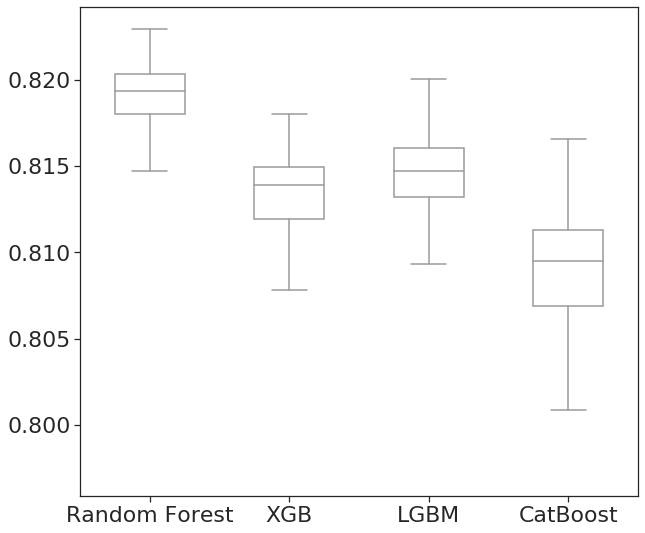

In [32]:
feature_set = "AF_NE"
metric = "f1"
rf_f1_scores = benchmark_results["random_forest"][feature_set]["metrics_iterations"][metric].values
xgb_f1_scores = tuned_results["xg_boost"][feature_set]["metrics_iterations"][metric].values
lgbm_f1_scores = tuned_results["light_boost"][feature_set]["metrics_iterations"][metric].values
cat_f1_scores = tuned_results["cat_boost"][feature_set]["metrics_iterations"][metric].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("new_exp1_afne_ell_boxplot_f1.png")